<a href="https://colab.research.google.com/github/alfa7g7/Gestion-estrategica-I/blob/main/regProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes: 

- Raul Echeverry
- Esteban Ordoñez
- Fabian Salazar

# Proyecto de Aprendizaje Supervisado
- Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de regresión.
- Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

## 1. Librerías básicas a utilizar

- Pandas: para el análisis de datos a través de dataframes (data tabular)
- Numpy: para todo lo relacionado con manipulación de arreglos y análisis numérico
- Seaborn y matplotlib.pyplot: para visualización de datos

In [2]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

# Librería para el manejo de expresiones regulares
import re

import warnings
warnings.filterwarnings("ignore")

## 2. Lectura de los datos

- El primer paso es la Lectura del archivo csv a un dataframe de pandas
- Se trata de una tarea de regresión ya que la variable objetivo es la oportunidad de admisión - Chance_of_Admission (tipo continua)


In [3]:

df = pd.read_csv(r'https://raw.githubusercontent.com/alfa7g7/Gestion-estrategica-I/main/1_tareas_regresion/university_admission.csv')
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


Al hacer el llamado al dataframe, podemos dar un primer vistazo al conjunto de datos.

## 3. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 3.1. Limpieza de datos

Para realizar una apropiada limpieza de datos se deben entender cada una de las variables presentes dentro del conjunto de datos.

Elementos a tener en cuenta:
- El significado y tipo (e.g. nominal/ordinal/intervalo/ratio) de cada una de las variables
- Identificación de valores faltantes y en caso de haberlos plantear las opciones para tratarlos
- Presencia de datos atípicos y en caso de haberlos identificar la manera de tratarlos


In [4]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

Formateamos los nombres de las variables

In [5]:
def format_columns(df):
    result = df.copy()
    new_cols = []
    for col in result.columns:
        new_cols.append(re.sub(r'\s+', ' ',col.strip()).replace(' ','_').lower()) #cualquier aparicion de 1 o más espacio lo voy a reemplazar por un solo espacio
    result.columns = new_cols
    return result

Descripciones de variables

- GRE_Score **(Ratio - Discreta)**: Puntuación en el Graduate Record Examination (GRE), un examen estandarizado utilizado para la admisión a programas de posgrado cuyo rango es desde 260 hasta 340.
- TOEFL_Score **(Ratio - Discreta)**: Puntuación en el Test of English as a Foreign Language (TOEFL), un examen estandarizado para medir la habilidad en inglés de hablantes no nativos cuyo rango es desde 0 hasta 120.
- University_Rating **(Ordinal)**: Calificación de la universidad, generalmente en una escala de 1 a 5, donde 5 es la más alta.
- SOP **(Ratio - Continua)**: Strength of Statement of Purpose (Fuerza de la declaración de propósito), calificada en una escala de 1 a 5.
- LOR **(Ratio - Continua)**: Strength of Letters of Recommendation (Fuerza de las cartas de recomendación), calificada en una escala de 1 a 5.
- CGPA **(Ratio - Continua)**: Cumulative Grade Point Average (Promedio acumulativo de calificaciones),  en una escala de 10.
- Research **(Nominal)**: Indicador binario de investigación, donde 1 indica que el estudiante ha realizado investigaciones y 0 indica que no.
- Chance_of_Admission **(Ratio - Continua)**: Probabilidad de admisión, generalmente representada como un valor decimal entre 0 y 1.

Formateamos los nombres de las variables: a pesar de que las variables no tienen espacios, si se presentan letras en mayúsculas

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

# Creamos un Transformer para renombrar columnas
class Rename_columns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = format_columns(result)
        result = result
        return result

In [7]:
df_renamed = Rename_columns().fit_transform(df)

In [8]:
df_renamed.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admission'],
      dtype='object')

Tenemos nuestro dataset con nuestras columnas renombradas

### Valores faltantes

- Detección de valores faltantes
- Manejo de valores faltantes

### ¿Qué podemos hacer con estos?

- Identificar valores faltantes (no necesariamente representados por null)
- Imputarlos
- Eliminarlos (registros o columnas)

In [9]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gre_score            1000 non-null   int64  
 1   toefl_score          1000 non-null   int64  
 2   university_rating    1000 non-null   int64  
 3   sop                  1000 non-null   float64
 4   lor                  1000 non-null   float64
 5   cgpa                 1000 non-null   float64
 6   research             1000 non-null   int64  
 7   chance_of_admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [10]:
df_renamed.isnull().sum()

gre_score              0
toefl_score            0
university_rating      0
sop                    0
lor                    0
cgpa                   0
research               0
chance_of_admission    0
dtype: int64

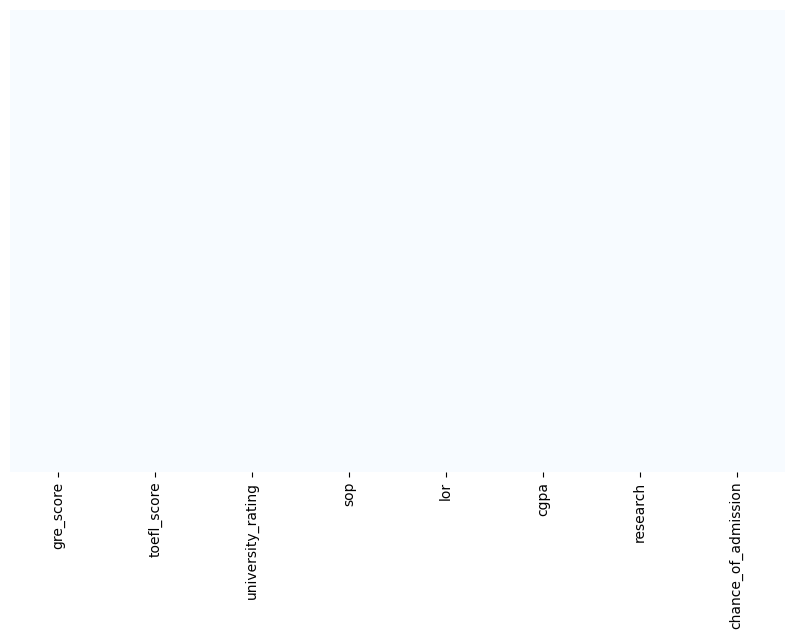

In [11]:
# Para revisar datos faltantes podemos dibujar un mapa de calor
# Nos permite encontrar la ubicación de dichos datos faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_renamed.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

No se identifican datos nulos explícitos.

Vamos a revisar aquellos que no son explícitamente nulos:
- Utilizamos el método describe para revisar cada variable para revisar si su descripción tiene sentido. 

In [12]:
df_renamed.describe()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


Todas las variables se encuentran en los rangos máximos y mínimos, por ende no existe presencia de valores nulos implícitos

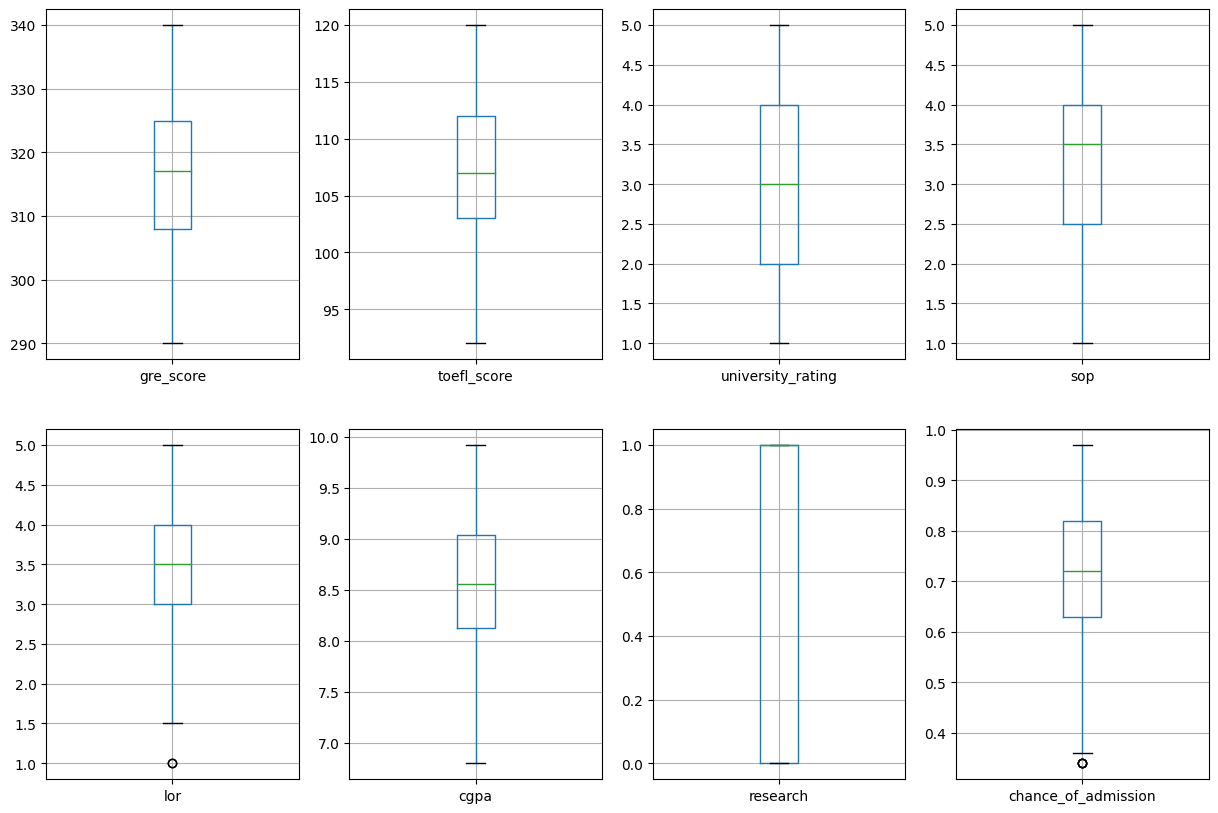

In [13]:
# Utilizamos diagramas de cajas y bigotes para verificar las variables que parecieron no tener sentido
plt.figure(figsize=(15,10))
for i, col in enumerate(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admission'], start=1):
    plt.subplot(2, 4, i)
    df_renamed.boxplot(col)

In [23]:
# Revision de valores que visualmente parecen atípicos en la variable lor
df_renamed.lor.unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [24]:
# Revision de valores que visualmente parecen atípicos en la variable chance_of_admission
df_renamed.chance_of_admission.unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

¿Qué obtenemos a partir de este análisis?

El dataset da muestra de tener consistencia y no presencia de datos nulos. Había dos sospecha de valores atípicos que en realidad solo eran unos valores muy bajos dentro de los parámetros y estandares permitidos

### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [21]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 20))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

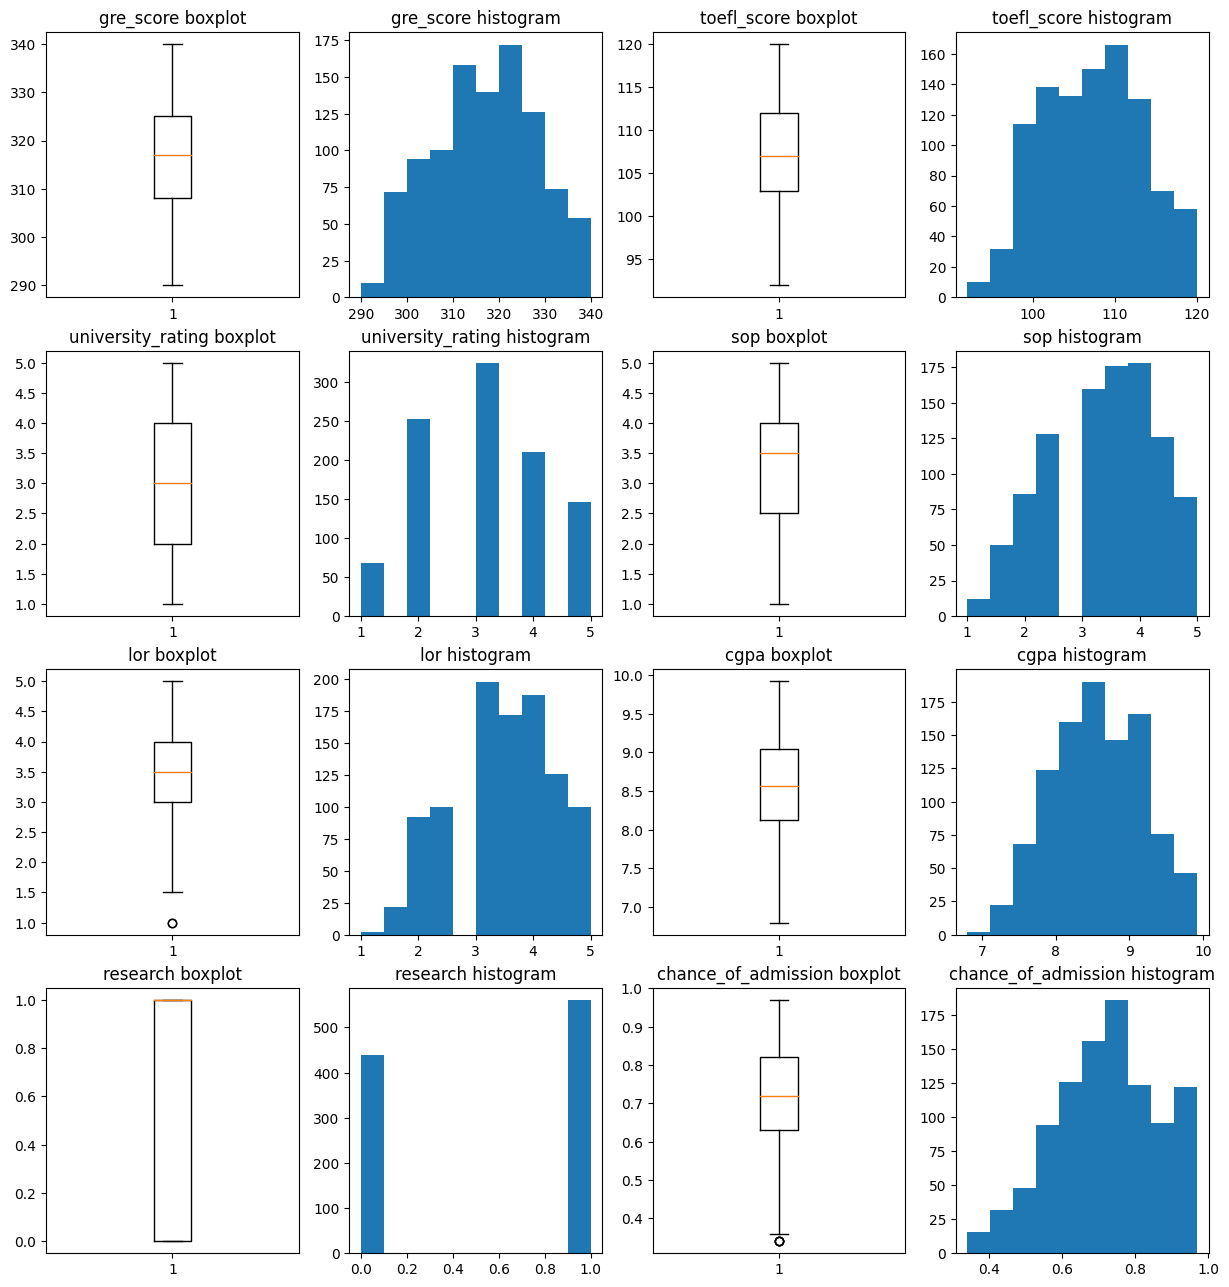

In [22]:
outliers_visual(df_renamed[['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admission']])

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que no existen outliers, sin embargo la variable LOR y la variable objetivo que muestran unos puntos por fuera del diagrama de caja, por tanto, es pertinente un análisis mas profundo en estos casos.

En la variable LOR se puede identificar un dato que aunque podría considerarse típico, se encuentra en la escala permitida, solamente que dicho registro tuvo la calificación mínima. Verificamos los registros con LOR = 1 solo para cerciorarse de que no sean datos atípicos, puesto que dado una calificación tan baja en esta variable se intuye que la oportunidad de admisión debe ser también relativamente baja.

In [25]:
lor_equals_one = df_renamed[df_renamed['lor'] == 1]
lor_equals_one

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admission
347,299,94,1,1.0,1.0,7.34,0,0.42
847,299,94,1,1.0,1.0,7.34,0,0.42


De acuerdo con esta validación se puede concluir que esos datos bajo de LOR no podemos considerarlos atípicos dado que se encuentran en la escala y al ver su comportamiento en los valores más bajos se observa que también la oportunidad de admisión es baja.  

Por su parte los datos más bajos de Posibilidad de admisión también se analizan con respecto a las demás variables y como se puede identificar a continuación estos puntajes bajos también concuerdan con criterios con baja puntuación por ende los datos de Chance_of_Admission no podríamos identificarlos como outliers.

In [26]:
chad_equals_one = df_renamed[df_renamed['chance_of_admission'] == df_renamed['chance_of_admission'].min()]
chad_equals_one

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admission
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34
592,298,98,2,4.0,3.0,8.03,0,0.34
876,297,96,2,2.5,2.0,7.43,0,0.34


Sin embargo, para corroborar lo anterior, podemos usar el método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil).

In [27]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [28]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df_renamed.select_dtypes('number').columns):
    if outlier_count(col, df_renamed) > 0:
        cont_vars.append(col)

---------------gre_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------toefl_score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------university_rating---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sop---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------lor---------------
Number of outliers: 2
Percent of data that is outlier: 0.2%
---------------cgpa---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------research---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chance_of_admission---------------
Number of outliers: 4
Percent of data that is outlier: 0.4%


Estos outliers detectaros con tukey son los mismos que se ahondaron anteriormente. Se concluye que a pesar que puede denotarse como outliers con base en los datos, en la realidad no lo son, igualmente no tiene gran representatividad en el dataset, puesto que son tan solo 6 en total. 


### 3.2. Exploración de datos
- Análisis univariado
    - Variables continuas
    - Variables categóricas
- Análisis Bivariado
    - Variables continuas comparadas con variable objetivo y entre sí
    - Variables categóricas con respecto a variable objetivo

### Análisis univariado

La idea con este este análisis es ver cada variable por sí sola. Generalmente se realiza con la ayuda de histogramas para variables continuas y countplots o barplot para datos categóricos. Además de incluir los reportes estadísticos que no deben faltar.

In [37]:
# Descriptores estadísticos para valores continuos
df_renamed[['gre_score', 'toefl_score',  'sop', 'lor', 'cgpa',
        'chance_of_admission']].describe()

,gre_score,toefl_score,sop,lor,cgpa,chance_of_admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,316.472000,107.193000,3.374000,3.484000,8.57644,0.72174
std,11.289494,6.079368,0.990507,0.924986,0.60451,0.14107
min,290.000000,92.000000,1.000000,1.000000,6.80000,0.34000
25%,308.000000,103.000000,2.500000,3.000000,8.12750,0.63000
50%,317.000000,107.000000,3.500000,3.500000,8.56000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,9.04000,0.82000
max,340.000000,120.000000,5.000000,5.000000,9.92000,0.97000


In [29]:
# Descriptores estadísticos para valores categóricos

# Convertir las columnas a tipo categórico
df_renamed['university_rating'] = df_renamed['university_rating'].astype('category')
df_renamed['research'] = df_renamed['research'].astype('category')

# Obtener descriptores estadísticos
print(df_renamed[['university_rating', 'research']].describe(include='category'))

        university_rating  research
count                1000      1000
unique                  5         2
top                     3         1
freq                  324       560


In [31]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 3, i)
        plt.hist(df[col])
        plt.title(col)

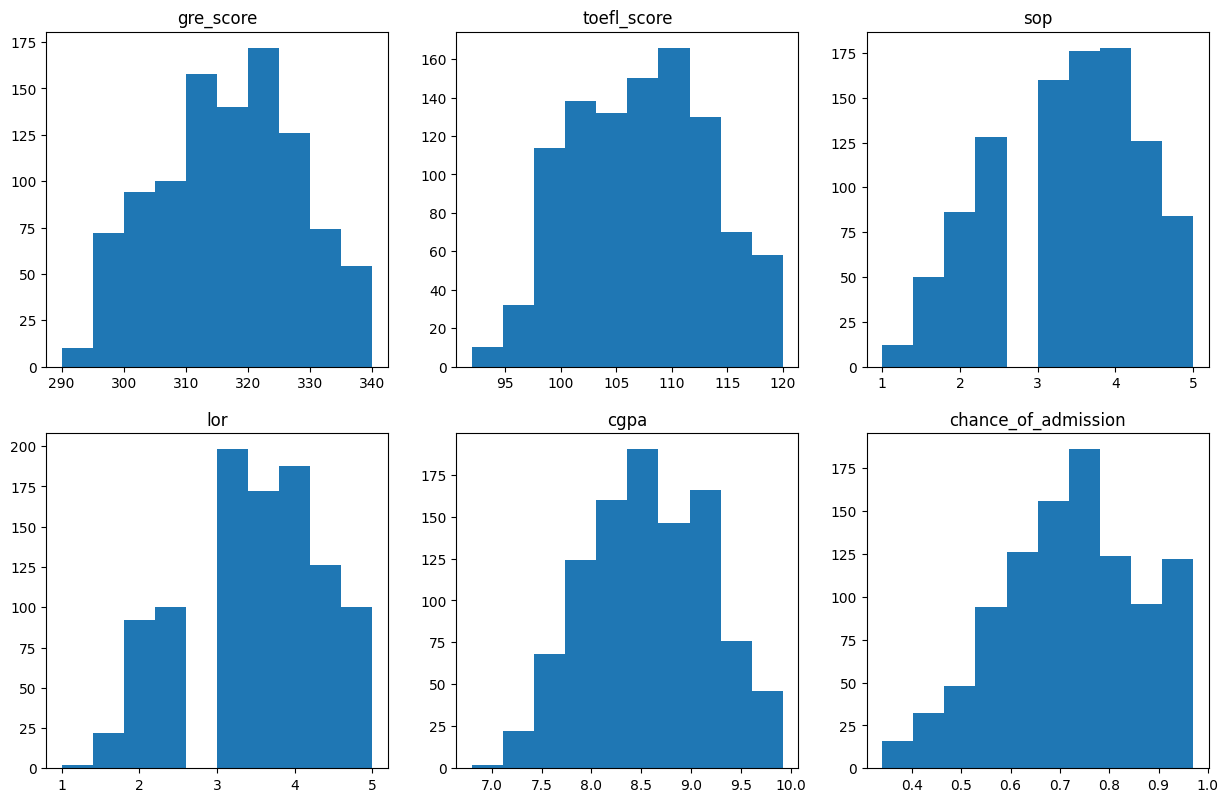

In [32]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df_renamed)

La mayoría de las variables independientes (GRE_Score, TOEFL_Score, SOP, LOR, CGPA) tienen distribuciones aproximadamente normales o unimodales.
La variable objetivo Chance_of_Admission tiene una distribución bimodal, lo que podría indicar una segmentación natural en los datos (por ejemplo, estudiantes con altas y bajas probabilidades de admisión).

Relación Potencial:

- Dado que la mayoría de las variables tienen distribuciones normales, es probable que estas variables tengan una relación lineal con la Chance_of_Admission.
- Las variables como GRE_Score, TOEFL_Score, y CGPA, que tienen distribuciones más centradas, podrían tener una mayor influencia en la predicción de la probabilidad de admisión.
- Las variables SOP y LOR, aunque sesgadas, también pueden proporcionar información valiosa, especialmente si las calificaciones más altas tienden a correlacionarse con una mayor Chance_of_Admission.

In [49]:
# Función para graficar las frecuencias de las columnas categóricas
def plot_frequencies(data, categorical_columns):
    plt.figure(figsize=(15, 10 * len(categorical_columns) // 2))
    i = 1
    for col in categorical_columns:
        plt.subplot(len(categorical_columns), 2, i)
        value_counts = data[col].value_counts().sort_index()
        value_counts.plot(kind='bar')
        
        # Agregar etiquetas a cada barra
        for index, value in enumerate(value_counts):
            plt.text(index, value, str(value), ha='center', va='bottom')
        
        plt.title(f'Frecuencia de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        i += 1
    
    plt.tight_layout()
    plt.show()

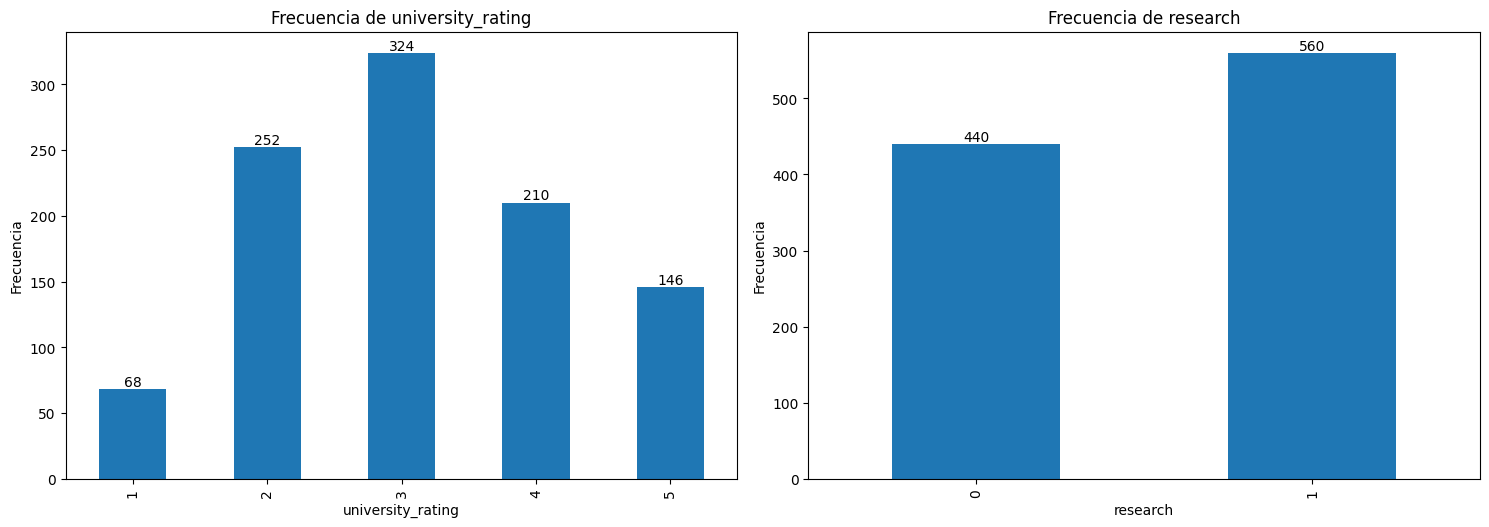

In [50]:
# Distribución las columnas 'University_Rating' y 'Research'
categorical_columns = ['university_rating', 'research']
plot_frequencies(df_renamed, categorical_columns)

Aunque no resulta una gráfica muy amigable, se puede observar que la gran mayoría de países tienen 16 registros (16 años). Podemos notar que los países no están sobrerepresentados.University_Rating:

- La distribución de las calificaciones universitarias está centrada en el rango medio (2, 3, 4), con la calificación "3" siendo la más común. Esto puede indicar que la mayoría de las universidades tienen un rendimiento o una reputación moderadamente alta.
- Las calificaciones extremas (1 y 5) son menos comunes, sugiriendo que hay pocas universidades que se destacan como muy bajas o muy altas en calificación.


Research:

- Más de la mitad de los estudiantes han realizado investigaciones, lo cual puede ser un indicativo de una inclinación hacia la investigación en el perfil estudiantil.
- La experiencia en investigación es un aspecto notablemente común, aunque una porción significativa de estudiantes no tiene esta experiencia.

### Análisis Bivariado
Aspectos de relevancia a tener en cuenta:
- Variables continuas con respecto a esperanza de vida (independientes vs dependiente) y entre ellas
- Variables categóricas con respecto a esperanza de vida (independientes vs dependiente)
- Variables categóricas con respecto a continuas (Caso de año y país vs las demás)

In [58]:
# Matriz de correlación entre variables continuas
df_renamed[df_renamed.select_dtypes('number').columns].corr()

,gre_score,toefl_score,sop,lor,cgpa,chance_of_admission
gre_score,1.000000,0.827076,0.613498,0.524679,0.825878,0.810351
toefl_score,0.827076,1.000000,0.644374,0.541340,0.810644,0.791921
sop,0.613498,0.644374,1.000000,0.663707,0.712154,0.684137
lor,0.524679,0.541340,0.663707,1.000000,0.637469,0.645365
cgpa,0.825878,0.810644,0.712154,0.637469,1.000000,0.882413
chance_of_admission,0.810351,0.791921,0.684137,0.645365,0.882413,1.000000


In [59]:
def correlation_matrix(df,y=True):
    if y:
        cont_vars = list(df.select_dtypes('number').columns)
    else:
        cont_vars = list(df.select_dtypes('number').columns)
    mask = np.triu(df[cont_vars].corr())
    plt.figure(figsize=(20,10))
    sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    plt.ylim(len(df.select_dtypes(include=['number']).columns), 0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

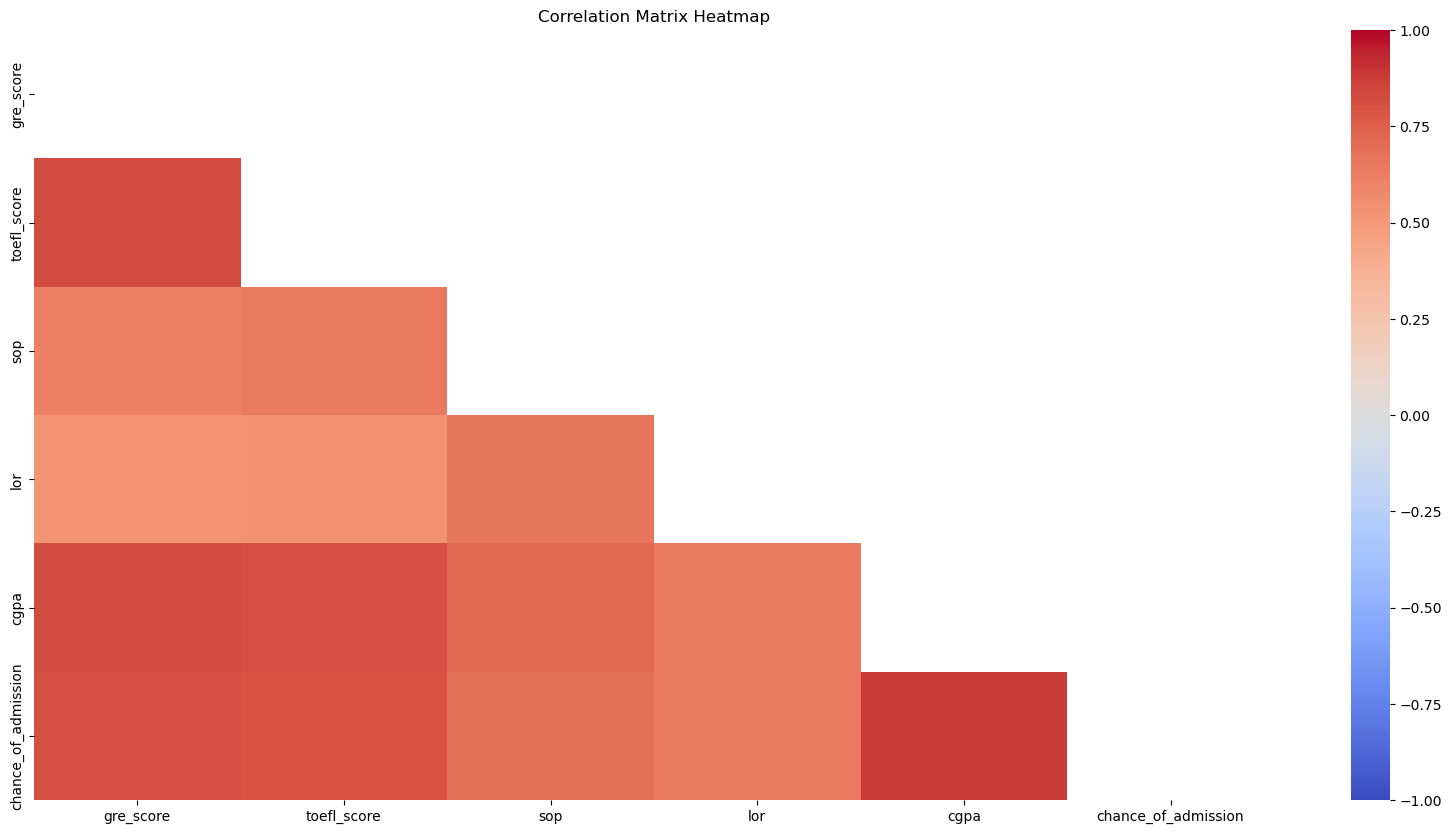

In [60]:
correlation_matrix(df_renamed)

Utilizando la matriz podemos observar importantes correlaciones entre variables, en donde a simple vista detectamos unciamente correlaciones positívas:
- Posibilidad de admisión está altamente correlacionada con:
    - GRE_Score (positiva) - Puntuación en el Graduate Record Examination
    - CGPA (Positiva) - Promedio acumulativo de calificaciones
    - TOEFL_Score (positiva) -Puntuación en el Test of English as a Foreign Language
- La variable objetivo se encuentra medianamente correlacionada con LOR (Fuerza de la declaración de propósito) y SOP (Fuerza de las cartas de recomendación)
- CGPA (Promedio acumulativo de calificaciones) evidentemente están altamente correlacionada con GRE_Score, TOEFL_Score y  SOP.
- TOEFL_Score se encuentra altamente correlacionada con GRE_Score 


Se debe evitar variables independientes altamente correlacionadas entre sí. Igualmente, las variables independientes altamente correlacionadas con la variable dependiente pueden resultar más importante a la hora de implementar los modelos



In [62]:
def visualize_chance_of_admission(df):
    sns.lineplot(data=df, x='university_rating', y='chance_of_admission', marker='o')
    plt.title('chance of admission for university_rating')
    plt.show()

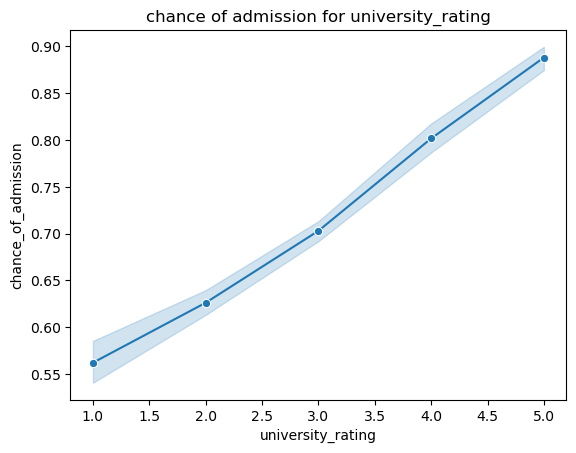

In [63]:
visualize_chance_of_admission(df_renamed)

A partir del gráfico anterior podemos observar una tendencia, hay que corroborar si resulta significativa para incluirla dentro del modelo

In [64]:
df_renamed.university_rating.corr(df_renamed.chance_of_admission)

0.6901323687886896

Existe una correlación moderada, se debe indagar a más profundidad si las diferencias entre los ranking de las universidades resultan considerables para considerarlos distintos.

Un A-test resultaría útil para verificar.

In [65]:
from scipy import stats

def t_testing_rating(df):
    ratings = list(df.university_rating.unique())
    ratings.sort()
    rating_le = {}
    for rating in ratings:
        rating_data = df[df.university_rating == rating].chance_of_admission
        rating_le[rating] = rating_data
    for rating in ratings[:-1]:
        print(10*'-' + str(rating) + ' to ' + str(rating+1) + 10*'-')
        print(stats.ttest_ind(rating_le[rating], rating_le[rating+1], equal_var=False))

In [67]:
t_testing_rating(df_renamed)

----------1 to 2----------
TtestResult(statistic=-4.656099096737762, pvalue=8.789424072855965e-06, df=113.78069876521847)
----------2 to 3----------
TtestResult(statistic=-8.82068214427715, pvalue=1.774487654783634e-17, df=514.0418258779707)
----------3 to 4----------
TtestResult(statistic=-10.125835829538152, pvalue=1.4823524483505005e-21, df=390.82942144799176)
----------4 to 5----------
TtestResult(statistic=-8.510846829404299, pvalue=5.073272090492254e-16, df=351.4736801360325)


Teniendo en cuenta que para un t-test si el valor del p-value no es menor que 0.05 no es considerado como estadísticamente significativo, podemos observar que la diferencia entre años para la esperanza de vida no resulta significativa.

Ahora revisamos para el caso de status. Observando la diferencia entre develping y developed con respecto de la esperanza de vida.

In [68]:
df_renamed.groupby('research').chance_of_admission.agg(['mean'])

,mean
research,
0,0.634909
1,0.789964


Se observa que los estudiantes con experiencia investigativa parecen tener una posibilidad de admisión más alta. Para corroborar podemos utilizar un t-test.

In [71]:
def t_testing_research(df):
    yes_research_ad = df[df.research == 1].chance_of_admission
    no_research_ad = df[df.research == 0].chance_of_admission
    print(stats.ttest_ind(yes_research_ad, no_research_ad, equal_var=False)) 

In [72]:
t_testing_research(df_renamed)

TtestResult(statistic=20.82046908168119, pvalue=5.6759203247446246e-80, df=977.3060614932782)


A partir del p-value se puede corroborar que las diferencias son muy significativas. Lo cual nos indica que status puede resultar importante para la implementación de futuros modelos.

### 3.3. Ingeniería de características

Vamos a eliminar y/o crear nuevas características que nos resulten útiles para la futura implementación de nuestros modelos

In [73]:
# Creamos un Transformer personalizado para dummificar la variable University_Rating
from sklearn.base import BaseEstimator, TransformerMixin
class Dummify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = pd.get_dummies(result,columns=['university_rating'],dtype=float)
        return result

In [74]:
df_dummified = Dummify().fit_transform(df_renamed)
df_dummified

,gre_score,toefl_score,sop,lor,cgpa,research,chance_of_admission,university_rating_1,university_rating_2,university_rating_3,university_rating_4,university_rating_5
0,337,118,4.5,4.5,9.65,1,0.92,0.0,0.0,0.0,1.0,0.0
1,324,107,4.0,4.5,8.87,1,0.76,0.0,0.0,0.0,1.0,0.0
2,316,104,3.0,3.5,8.00,1,0.72,0.0,0.0,1.0,0.0,0.0
3,322,110,3.5,2.5,8.67,1,0.80,0.0,0.0,1.0,0.0,0.0
4,314,103,2.0,3.0,8.21,0,0.65,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,332,108,4.5,4.0,9.02,1,0.87,0.0,0.0,0.0,0.0,1.0
996,337,117,5.0,5.0,9.87,1,0.96,0.0,0.0,0.0,0.0,1.0
997,330,120,4.5,5.0,9.56,1,0.93,0.0,0.0,0.0,0.0,1.0
998,312,103,4.0,5.0,8.43,0,0.73,0.0,0.0,0.0,1.0,0.0


In [75]:
def convertir_research_a_float(df):
    df['research'] = df['research'].astype(float)
    return df

In [76]:
convertir_research_a_float(df_dummified)

,gre_score,toefl_score,sop,lor,cgpa,research,chance_of_admission,university_rating_1,university_rating_2,university_rating_3,university_rating_4,university_rating_5
0,337,118,4.5,4.5,9.65,1.0,0.92,0.0,0.0,0.0,1.0,0.0
1,324,107,4.0,4.5,8.87,1.0,0.76,0.0,0.0,0.0,1.0,0.0
2,316,104,3.0,3.5,8.00,1.0,0.72,0.0,0.0,1.0,0.0,0.0
3,322,110,3.5,2.5,8.67,1.0,0.80,0.0,0.0,1.0,0.0,0.0
4,314,103,2.0,3.0,8.21,0.0,0.65,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,332,108,4.5,4.0,9.02,1.0,0.87,0.0,0.0,0.0,0.0,1.0
996,337,117,5.0,5.0,9.87,1.0,0.96,0.0,0.0,0.0,0.0,1.0
997,330,120,4.5,5.0,9.56,1.0,0.93,0.0,0.0,0.0,0.0,1.0
998,312,103,4.0,5.0,8.43,0.0,0.73,0.0,0.0,0.0,1.0,0.0


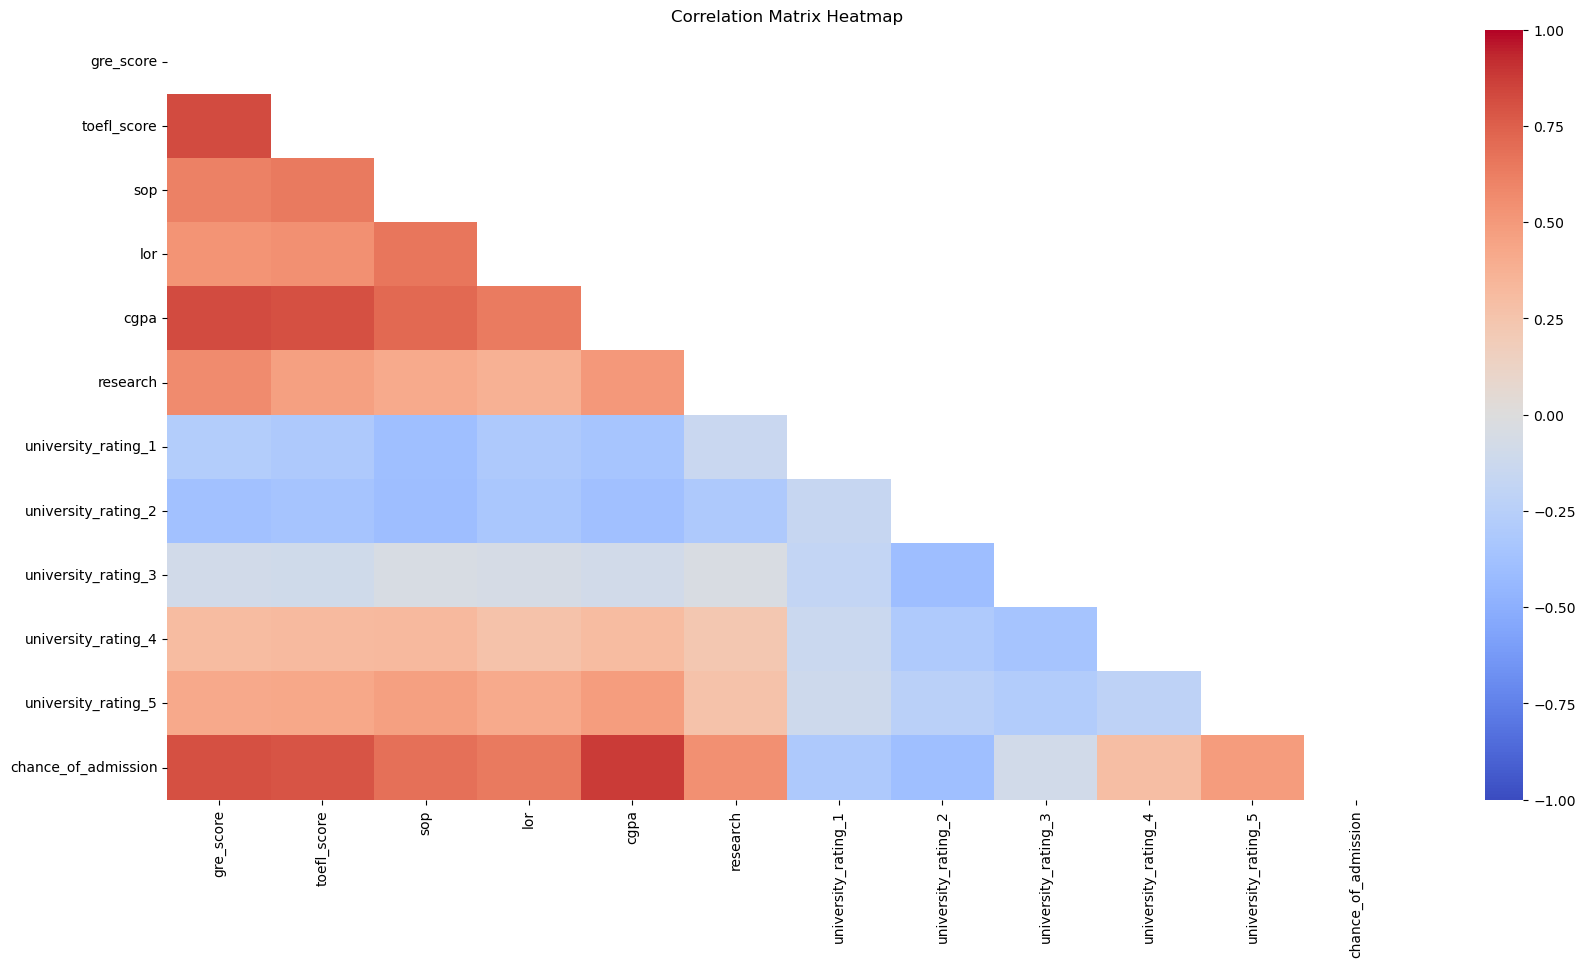

In [77]:
correlation_matrix(df_dummified[['gre_score', 'toefl_score', 'sop', 'lor', 'cgpa', 'research',
        'university_rating_1', 'university_rating_2',
       'university_rating_3', 'university_rating_4', 'university_rating_5', 'chance_of_admission']], False)


Las siguientes variables podemos considerarlas como altamente correlacionadas entre sí (correlación > .7 o correlación < -.7):

- TOEFL_Score/GRE_Score: 0.83 (hacer drop de TOEFL_Score ya que GRE_Score está más altamente correlacionados con la posibilidad de admisión)
- GRE_Score/CGPA: 0.83 (hacer drop de GRE_Score ya que CGPA está más altamente correlacionados con la posibilidad de admisión)
- TOEFL_Score/CGPA: 0.81 (concuerda como anterioremente se menciona de hacer drop de TOEFL_Score)
- CGPA/SOP: 0.71 (hacer drop de SOP ya que CGPA está más altamente correlacionados con la posibilidad de admisión)


Puede resultar útil eliminar las variables que no se encuentren muy correlacionadas con la esperanza de vida.
- University_Rating_3

In [81]:
# Creamos un Transformer personalizado para realizar la eliminación de variables
# a partir de sus correlaciones
class Remove_highly_correlated_features(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=['toefl_score', 'gre_score','sop',
                                      'university_rating_3'])
        return result

In [82]:
df_dummified_removed = Remove_highly_correlated_features().fit_transform(df_dummified)
df_dummified_removed = df_dummified_removed[['chance_of_admission', 'lor', 'cgpa', 'research', 'university_rating_1',
       'university_rating_2', 'university_rating_4', 'university_rating_5']]
df_dummified_removed

,chance_of_admission,lor,cgpa,research,university_rating_1,university_rating_2,university_rating_4,university_rating_5
0,0.92,4.5,9.65,1.0,0.0,0.0,1.0,0.0
1,0.76,4.5,8.87,1.0,0.0,0.0,1.0,0.0
2,0.72,3.5,8.00,1.0,0.0,0.0,0.0,0.0
3,0.80,2.5,8.67,1.0,0.0,0.0,0.0,0.0
4,0.65,3.0,8.21,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.87,4.0,9.02,1.0,0.0,0.0,0.0,1.0
996,0.96,5.0,9.87,1.0,0.0,0.0,0.0,1.0
997,0.93,5.0,9.56,1.0,0.0,0.0,0.0,1.0
998,0.73,5.0,8.43,0.0,0.0,0.0,1.0,0.0


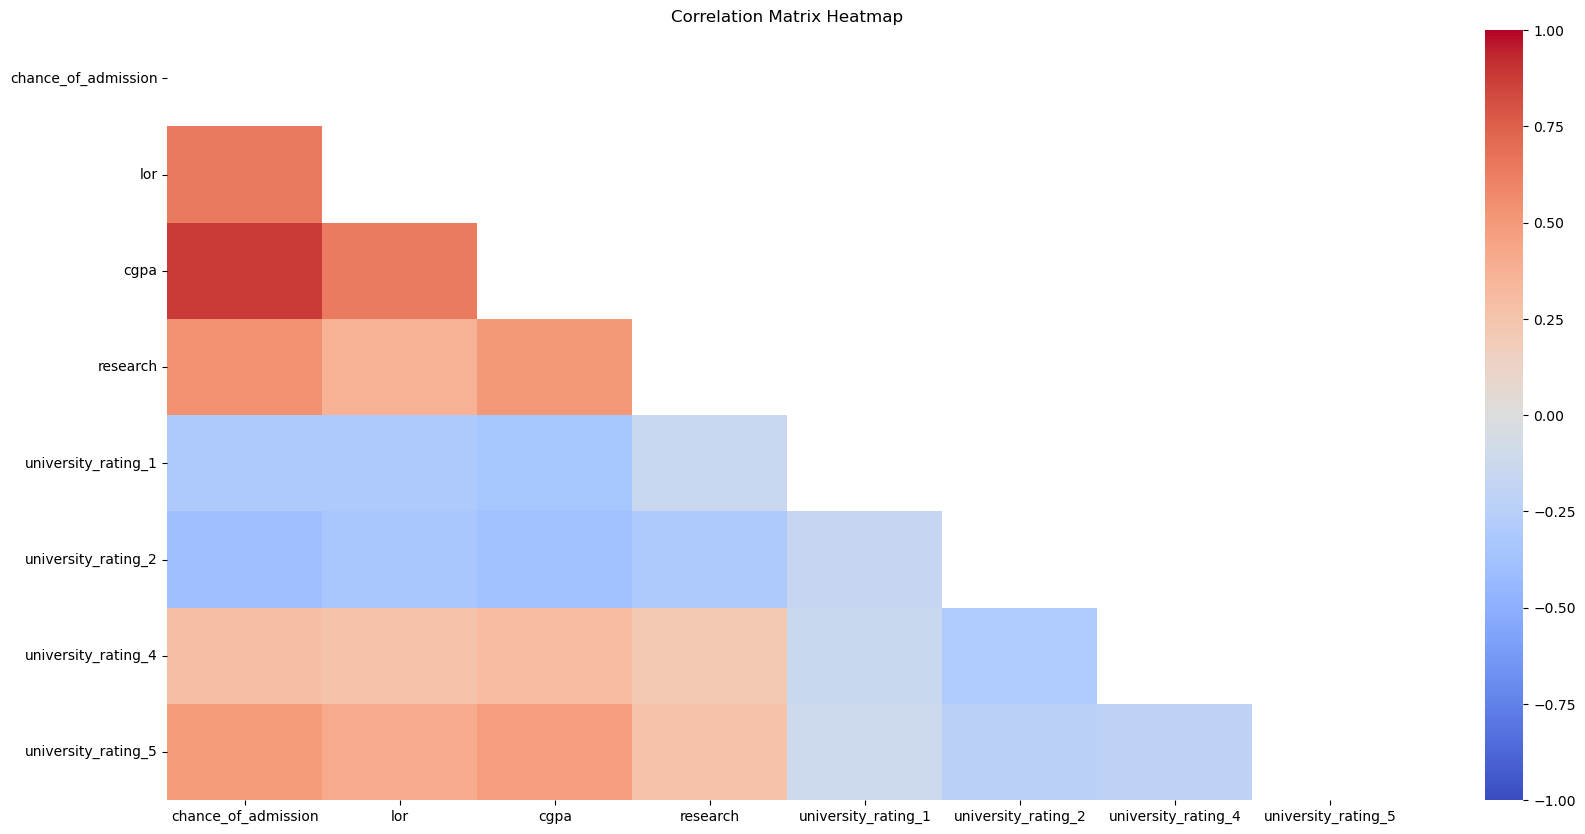

In [83]:
correlation_matrix(df_dummified_removed,False)

Hacemos uso de un pipeline para dejar listos nuestros dataframes que posteriormente utilizaremos para entrenar nuestros modelos

In [86]:
from sklearn.pipeline import Pipeline

pipe_mean_rem = Pipeline(steps = [('rename columns',Rename_columns()),
                   ('Dummify categorical variables',Dummify()),
                   ('Remove highly correlated features',Remove_highly_correlated_features())])


df_pipeline_mean_rem = pipe_mean_rem.fit_transform(df)


### 4. Protocolos de evaluación

In [88]:
# Con nuestra primera aproximación (imputación con la media)
# Eliminación de variables altamente correlacionadas
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento

from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()


X['mean_rem'], y['mean_rem'] = obtain_X_y(df_pipeline_mean_rem)

X_train['mean_rem'], X_test['mean_rem'], y_train['mean_rem'], y_test['mean_rem'] = train_test_split(X['mean_rem'],y['mean_rem'],random_state=1234,test_size=0.3)
print(X_train['mean_rem'].shape)
print(X_test['mean_rem'].shape)
print(y_train['mean_rem'].shape)
print(y_test['mean_rem'].shape)

(700, 7)
(300, 7)
(700, 1)
(300, 1)


### 5. Métricas de evaluación

In [89]:
# Implementamos una función que nos permita calcular las métricas de regresión para el conjunto
# de entrenamiento y de prueba
# R2, R2 Ajustado MAE, MAPE, MSE, RMSE
# El coeficiente de determinación se puede ver como la varianza total explicada por el modelo,
# es decir la proporción de la varianza en la variable dependiente que se puede predecir a partir de
# las variables independientes
# Nos retorna el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de
# entrenamiento y el de prueba

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics

def r2_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test


## 6. Implementación de modelos

### 6.1. Baseline
Como punto de partida para poder comparar cualquier modelo de regresión que pensemos implementar, debemos establecer un baseline. Al estar tratando con una tarea de regresión, hacemos uso de un Dummy regressor con estrategía de la media.

In [81]:
# Establecemos el baseline a partir de un dummy regressor

from sklearn.dummy import DummyRegressor

print('Using a dataframe imputed with the mean and with highly correlated variables removed')
regression_metrics(DummyRegressor(strategy='mean'),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Using a dataframe imputed with knn and with highly correlated variables removed')
regression_metrics(DummyRegressor(strategy='mean'),X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])


Using a dataframe imputed with the mean and with highly correlated variables removed
Training R^2 = 0.0
Test R^2 = -0.002546626945723496
Training Adj R^2 = -0.005873715124816492
Test Adj R^2 = -0.016390769089968282
Training MAE = 7.686621904403313
Test MAE = 7.825350843277924
Training MAPE = 0.11949344614379402
Test MAPE = 0.12330561323780447
Training RMSE = 9.425571212135651
Test RMSE = 9.545149660056946

Using a dataframe imputed with knn and with highly correlated variables removed
Training R^2 = 0.0
Test R^2 = -0.002546626945723496
Training Adj R^2 = -0.005873715124816492
Test Adj R^2 = -0.016390769089968282
Training MAE = 7.686621904403313
Test MAE = 7.825350843277924
Training MAPE = 0.11949344614379402
Test MAPE = 0.12330561323780447
Training RMSE = 9.425571212135651
Test RMSE = 9.545149660056946


(DummyRegressor(),
 {'Training R^2': 0.0,
  'Test R^2': -0.002546626945723496,
  'Training Adj R^2': -0.005873715124816492,
  'Test Adj R^2': -0.016390769089968282,
  'Training MAE': 7.686621904403313,
  'Test MAE': 7.825350843277924,
  'Training MAPE': 0.11949344614379402,
  'Test MAPE': 0.12330561323780447,
  'Training RMSE': 9.425571212135651,
  'Test RMSE': 9.545149660056946})

Por supuesto podemos observar que los resultados no son buenos con este regresor.

### 6.2. Modelo de K vecinos más cercanos
Un algoritmo simple pero bastante útil que nos sirve para resolver tanto tareas de clasificación como de regresión.

- Es fácil de entender e implementar
- No hace suposiciones sobre la distribución de los datos.


Procederemos utilizando nuestros dataframes resultado de las etapas previas del proceso de analítica de datos.

Iniciamos con el dataframe imputado con la media y en el que eliminamos aquellas variables que se encontraban altamente correlacionadas entre sí (para evitar problemas de multicolinealidad)

In [82]:
# Utilizamos knn
# Con el dataset imputado con la media y eliminando las variables
# altamente correlacionadas
# Utilizamos el Knn regressor con sus parámetros por defecto

from sklearn.neighbors import KNeighborsRegressor

knnReg = KNeighborsRegressor()
regression_metrics(knnReg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Training R^2 = 0.7943902320854911
Test R^2 = 0.6739203730615935
Training Adj R^2 = 0.7931825388818816
Test Adj R^2 = 0.669417547373146
Training MAE = 2.9400944058174394
Test MAE = 3.8249250957213485
Training MAPE = 0.04503744696666784
Test MAPE = 0.059479561178372505
Training RMSE = 4.273951114497777
Test RMSE = 5.443676202021169


(KNeighborsRegressor(),
 {'Training R^2': 0.7943902320854911,
  'Test R^2': 0.6739203730615935,
  'Training Adj R^2': 0.7931825388818816,
  'Test Adj R^2': 0.669417547373146,
  'Training MAE': 2.9400944058174394,
  'Test MAE': 3.8249250957213485,
  'Training MAPE': 0.04503744696666784,
  'Test MAPE': 0.059479561178372505,
  'Training RMSE': 4.273951114497777,
  'Test RMSE': 5.443676202021169})

Observamos que knn no nos brinda un tan buen resultado. Evidentemente no es porque este sea un mal modelo, el problema es que este modelo se basa en distancias y si las escalas de las variables son diferentes, las decisiones del modelo estarán inapropiadamente dominadas por aquellas con mayor escala.

Por ello podemos normalizar o estandarizar los datos y verificar los resultados nuevamente.

Se debe tener en cuenta las diferencias en los procesos de escalamiento:
- Normalizar: las observaciones se cambian y reescalan de manera que terminen en un rango entre 0 y 1. También se le conoce como escalamiento min-max X_new = (X_ — X_min)/(X_max — X_min). No maneja muy bien los datos atípicos
- Estandarizar: es el proceso de poner distintas variables en la misma escala. Para cada observación de la variable se le substrae la media y se divide por la desviación estándar. La estandarización asume que los datos siguen una distribución normal. En este caso el resultado tienen sentido pues estamos utilizando un modelo no paramétrico, no lineal

In [83]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor())
regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsRegressor())
regression_metrics(knnReg_norm,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Stadardization
Training R^2 = 0.9416424412586438
Test R^2 = 0.891832561434606
Training Adj R^2 = 0.9412996655832173
Test Adj R^2 = 0.8903388798893992
Training MAE = 1.5693921030809463
Test MAE = 2.143547451767592
Training MAPE = 0.023863612001570007
Test MAPE = 0.03309800530100051
Training RMSE = 2.2769643808583298
Test RMSE = 3.1352972742582654

Normalization
Training R^2 = 0.9364643976410403
Test R^2 = 0.8858581285212842
Training Adj R^2 = 0.9360912076125001
Test Adj R^2 = 0.8842819461763537
Training MAE = 1.6406450532627417
Test MAE = 2.2369016021709225
Training MAPE = 0.024925630610894894
Test MAPE = 0.03455335286312453
Training RMSE = 2.3758348844180146
Test RMSE = 3.2207198251265385


(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('kneighborsregressor', KNeighborsRegressor())]),
 {'Training R^2': 0.9364643976410403,
  'Test R^2': 0.8858581285212842,
  'Training Adj R^2': 0.9360912076125001,
  'Test Adj R^2': 0.8842819461763537,
  'Training MAE': 1.6406450532627417,
  'Test MAE': 2.2369016021709225,
  'Training MAPE': 0.024925630610894894,
  'Test MAPE': 0.03455335286312453,
  'Training RMSE': 2.3758348844180146,
  'Test RMSE': 3.2207198251265385})

Analizando los resultados podemos observar que en ambos casos, al utilizar procesos de escalamiento, se mejoran los resultados.

Ahora buscamos el mejor valor de k (único hiperparámetro de este modelo)

In [84]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
    print()


Results for k = 1
Training R^2 = 1.0
Test R^2 = 0.8702050070251367
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8684126711037347
Training MAE = 0.0
Test MAE = 2.038126835433627
Training MAPE = 0.0
Test MAPE = 0.031422117750712165
Training RMSE = 0.0
Test RMSE = 3.4344675843773667

Results for k = 3
Training R^2 = 0.9587243014857947
Test R^2 = 0.8907291079049308
Training Adj R^2 = 0.9584818597911444
Test Adj R^2 = 0.8892201887965984
Training MAE = 1.2316549190959156
Test MAE = 2.085178989628638
Training MAPE = 0.01857355061116389
Test MAPE = 0.03216270249975784
Training RMSE = 1.9149387822165735
Test RMSE = 3.151248822732018

Results for k = 5
Training R^2 = 0.9416424412586438
Test R^2 = 0.891832561434606
Training Adj R^2 = 0.9412996655832173
Test Adj R^2 = 0.8903388798893992
Training MAE = 1.5693921030809463
Test MAE = 2.143547451767592
Training MAPE = 0.023863612001570007
Test MAPE = 0.03309800530100051
Training RMSE = 2.2769643808583298
Test RMSE = 3.1352972742582654

Results for k = 7
Tr

(0.8957301790708759, 9)


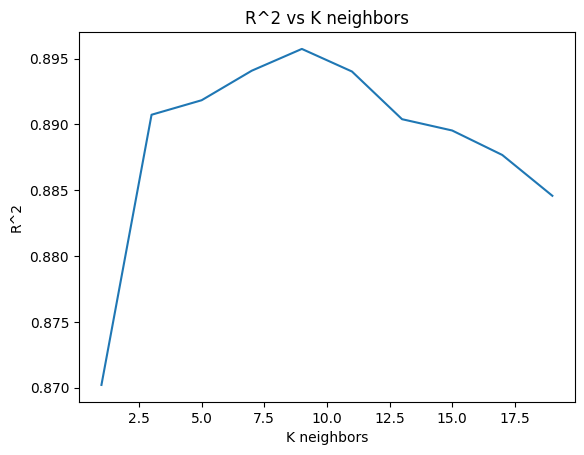

In [85]:
# Visualizamos el R^2

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Modelo de K vecinos más cercanos con k=9, datos imputados con la media y eliminando variables altamente correlacionadas.

Hacemos uso de pickle para guardar tanto el modelo ya entrenado como el resultado de las métricas de manera que al finalizar podamos comparar entre todos los modelos implementados y elegir el que presente mejores resultados en cuanto a las métricas más importantes sobre tareas de regresión

In [86]:
import pickle
# Guardamos el mejor modelo utilizando k=9 con todas las variables independientes e imputación con la media

model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=9)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9229173368512068
Test R^2 = 0.8957301790708759
Training Adj R^2 = 0.9224645752468086
Test Adj R^2 = 0.8942903196334197
Training MAE = 1.8877252060697554
Test MAE = 2.2418821687752213
Training MAPE = 0.028855173725575316
Test MAPE = 0.03457743076562025
Training RMSE = 2.616893414955947
Test RMSE = 3.078291661658348


### Selección de características

Aunque previamente, en la etapa de ingeniería de características habíamos creado nuevas variables y eliminado otras, en esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos.

Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

In [87]:
# Utilizamos un método para extracción recursiva de características utilizando validación cruzada
# Con este método obtenemos las variables independientes más importantes dentro del dataframe

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['mean_rem'], y_train['mean_rem'])

print("Ranking de características", selector.ranking_)

Ranking de características [1 1 5 1 1 2 3 1 4 1 1 6]


Utilizamos el método SelectKBest que nos permite seleccionar las  K mejores características utilizando como función de puntaje el f-regression.

El f-regression realiza una prueba estadística F entre cada característica y el target en un problema de regresión.

Calcula la relación entre cada característica independiente y la variable dependiente.

La prueba F compara el modelo de regresión que incluye una característica con un modelo que no la incluye.

Devuelve dos valores: la estadística F y el valor p correspondiente para cada característica. Un valor más alto de la estadística F indica una relación más fuerte entre la característica y la variable objetivo. Un valor p bajo indica que es poco probable que la característica no tenga una relación con la variable objetivo, es decir, la característica es relevante.

Graficamos con respecto al R^2 para observar cuál es el número de variables a seleccionar que nos presentan un mejor resultado.

Iteramos de 1 al número máximo de variables (en este caso 12)

(0.9213449448899993, 5)


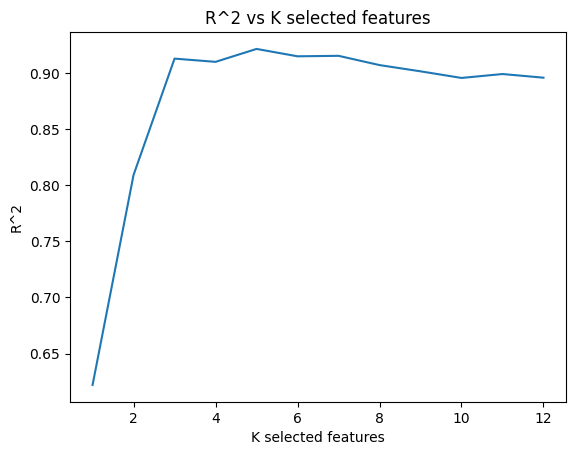

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=9)),
            X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])[1] for i in range(1,13)]
ax = sns.lineplot(x=range(1,13),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,13))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Guardamos el mejor modelo y sus métricas.

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Guardamos el mejor modelo utilizando k=9 con feature selection (con 5 elegidas),
# imputación con la media y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=9)),
                                   X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/KnnRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9430914342459045
Test R^2 = 0.9213449448899993
Training Adj R^2 = 0.942757169542503
Test Adj R^2 = 0.9202587991347404
Training MAE = 1.5497538857349404
Test MAE = 1.885848109735698
Training MAPE = 0.023500333797751714
Test MAPE = 0.028949247184399
Training RMSE = 2.2485186760916513
Test RMSE = 2.673583620762382


Ahora trabajamos con el segundo dataframe, en el que los datos se imputaron con knn con k=19 y se eliminaron las variables altamente correlacionadas entre sí

In [90]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la estandarización y el regresor knn

for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=k))
    regression_metrics(knnReg_st,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
    print()

Results for k = 1
Training R^2 = 1.0
Test R^2 = 0.86518422362869
Training Adj R^2 = 1.0
Test Adj R^2 = 0.8633225558306972
Training MAE = 0.0
Test MAE = 2.183179063975317
Training MAPE = 0.0
Test MAPE = 0.03368915042530166
Training RMSE = 0.0
Test RMSE = 3.5002640748375695

Results for k = 3
Training R^2 = 0.9495080392699924
Test R^2 = 0.8791565856011059
Training Adj R^2 = 0.949211463876571
Test Adj R^2 = 0.8774878618119382
Training MAE = 1.4129039888584127
Test MAE = 2.2918441693617337
Training MAPE = 0.021334920216210737
Test MAPE = 0.03543886406968164
Training RMSE = 2.117965087093582
Test RMSE = 3.3139194340367677

Results for k = 5
Training R^2 = 0.9319310322649325
Test R^2 = 0.8825824372406459
Training Adj R^2 = 0.9315312145396164
Test Adj R^2 = 0.8809610209539804
Training MAE = 1.7470777253301013
Test MAE = 2.33121817032824
Training MAPE = 0.026606574649390813
Test MAPE = 0.03596306372984171
Training RMSE = 2.4591343785030917
Test RMSE = 3.2666077103627273

Results for k = 7
Trai

(0.8868018527504221, 7)


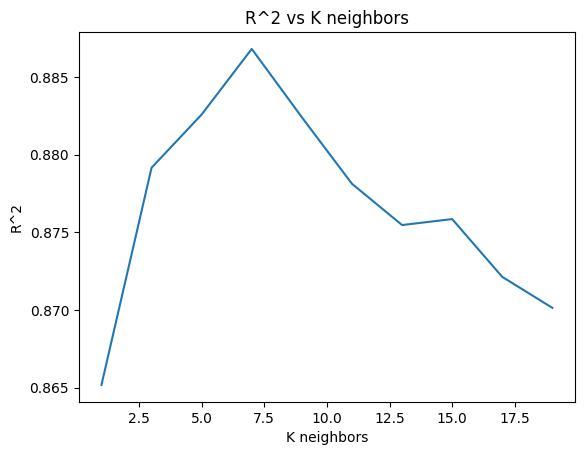

In [91]:
# Visualizamos el R^2

results = [r2_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i)),
            X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="R^2 vs K neighbors",ylabel='R^2',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [92]:
model,metrics = regression_metrics(make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=7)),
                                   X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/KnnRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9180385868973758
Test R^2 = 0.8868018527504221
Training Adj R^2 = 0.9175571689055836
Test Adj R^2 = 0.885238702270566
Training MAE = 1.9445386325736518
Test MAE = 2.3440421758086525
Training MAPE = 0.029631949363253085
Test MAPE = 0.036101654498928715
Training RMSE = 2.6984377120199436
Test RMSE = 3.20737774485352


In [93]:
estimator = RandomForestRegressor(n_estimators=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train['knn_rem'], y_train['knn_rem'])

print("Ranking de características", selector.ranking_)

Ranking de características [1 1 5 1 1 2 3 1 4 1 1 6]


(0.9245879728407468, 5)


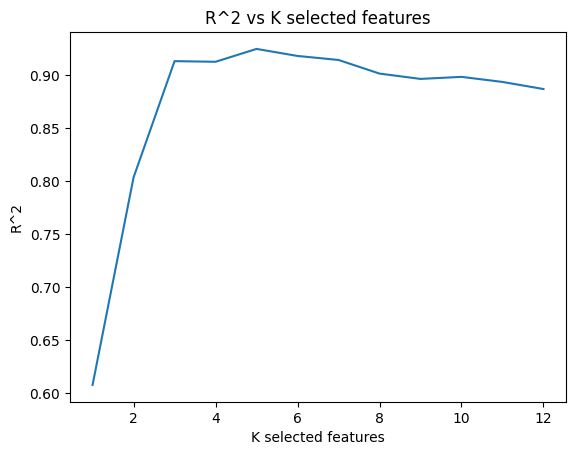

In [94]:
results = [r2_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=i),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=7)),
            X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])[1] for i in range(1,13)]
ax = sns.lineplot(x=range(1,13),
             y=results)
ax.set(title="R^2 vs K selected features",ylabel='R^2',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,13))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Modelo de K vecinos más cercanos con k=5, feature selection y datos imputados con knn

In [95]:
# Guardamos el mejor modelo utilizando k=7 con feature selection (con 5 elegidas),
# imputación con knn y eliminación de variables altamente correlacionadas

model,metrics = regression_metrics(make_pipeline(SelectKBest(score_func=f_regression, k=5),
                                                 StandardScaler(),
                                                 KNeighborsRegressor(n_neighbors=7)),
                                   X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/KnnRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.949793744505733
Test R^2 = 0.9245879728407468
Training Adj R^2 = 0.9494988472634759
Test Adj R^2 = 0.9235466099800896
Training MAE = 1.4309934253091428
Test MAE = 1.7971076486800808
Training MAPE = 0.021685065750051396
Test MAPE = 0.02770006937464407
Training RMSE = 2.111964407633229
Test RMSE = 2.617886175622423


### 6.3. Modelo de árbol de regresión

Training R^2 = 1.0
Test R^2 = 0.9135829234030575
Training Adj R^2 = 1.0
Test Adj R^2 = 0.9123895920806601
Training MAE = 2.4191630108563723e-17
Test MAE = 1.7896007583361213
Training MAPE = 5.305182041351693e-19
Test MAPE = 0.027239201752891178
Training RMSE = 4.1459844476113603e-16
Test RMSE = 2.8024007292633972


[Text(0.5, 0.9, 'x[7] <= 0.65\nsquared_error = 88.841\nsamples = 2056\nvalue = 69.393'),
 Text(0.25, 0.7, 'x[10] <= 0.796\nsquared_error = 35.438\nsamples = 1543\nvalue = 73.488'),
 Text(0.125, 0.5, 'x[0] <= 205.0\nsquared_error = 23.589\nsamples = 1151\nvalue = 71.274'),
 Text(0.0625, 0.3, 'x[10] <= 0.632\nsquared_error = 13.837\nsamples = 940\nvalue = 72.754'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[10] <= 0.537\nsquared_error = 13.763\nsamples = 211\nvalue = 64.678'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[10] <= 0.843\nsquared_error = 13.582\nsamples = 392\nvalue = 79.988'),
 Text(0.3125, 0.3, 'x[9] <= 0.85\nsquared_error = 7.414\nsamples = 141\nvalue = 76.884'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= 76.5\nsquared_error = 8.593\nsamples = 251\nvalue = 81.732'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Te

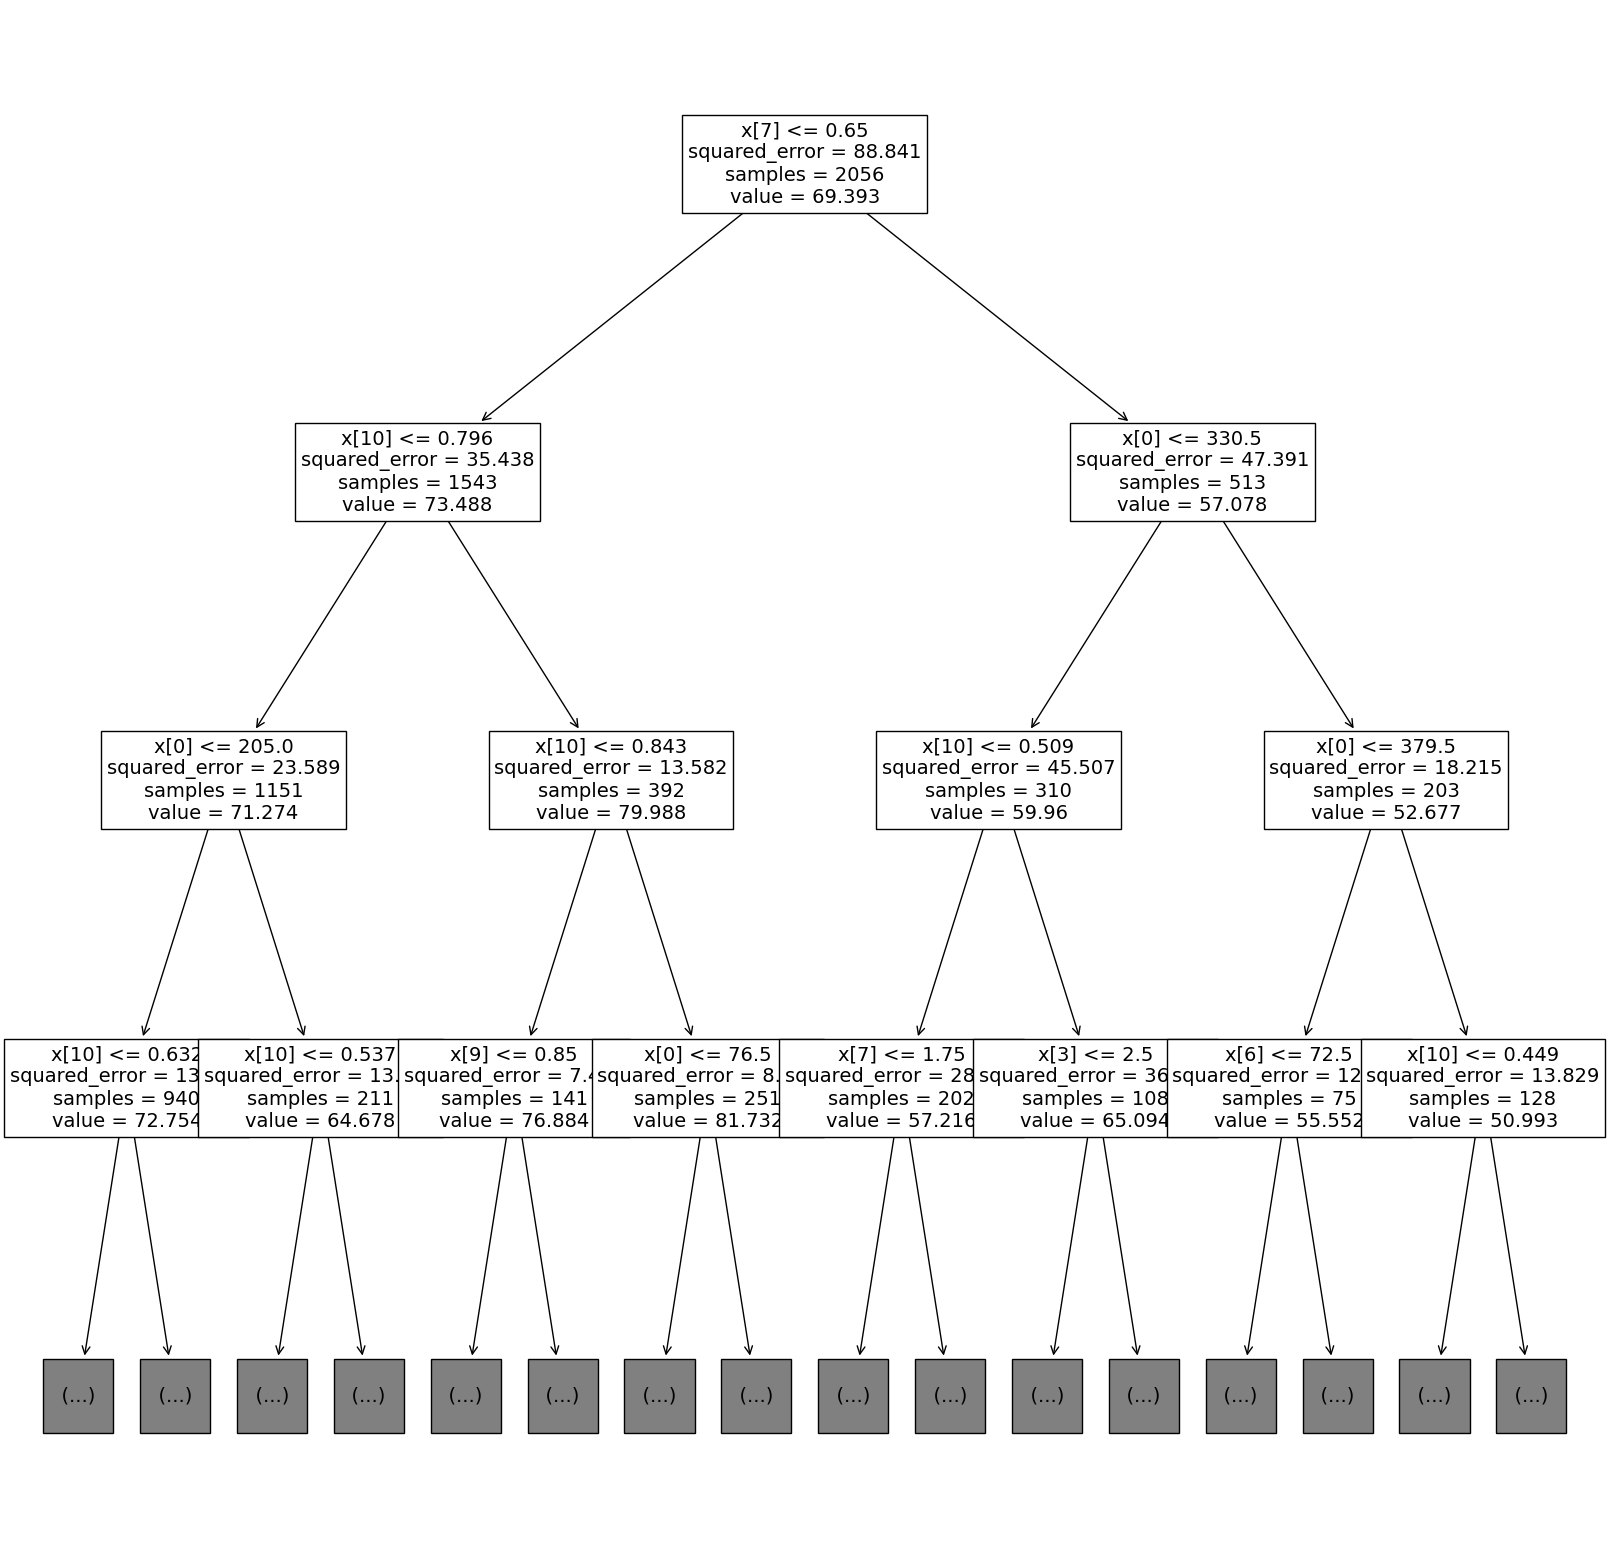

In [96]:
# Utilizamos un árbol de regresión
# Verificamos sus métricas

from sklearn.tree import DecisionTreeRegressor, plot_tree

regression_metrics(DecisionTreeRegressor(random_state=1234),X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

tree_reg = DecisionTreeRegressor(random_state=1234).fit(X_train['mean_rem'],y_train['mean_rem'])

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos imputados con la media y variables altamente correlacionadas entre sí eliminadas

In [97]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de regresión
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo de ejecución aprox: 12s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.532 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.529 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.526 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [98]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [99]:
# El R^2 del mejor modelo

tuning_model.best_score_

0.9115668042547725

Modelo de árbol de regresión con datos imputados con la media y variables altamente correlacionadas entre sí eliminadas

In [100]:
# El mejor modelo de árbol de regresión
# Con todas datos imputados con la media y eliminación de variables altamente correlacionadas

tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorImpMeanrem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpMeanRemMetrics.pkl','wb'))


Training R^2 = 0.9712325404396553
Test R^2 = 0.9178548596443067
Training Adj R^2 = 0.9710635685773332
Test Adj R^2 = 0.9167205193862303
Training MAE = 1.120828878220059
Test MAE = 1.8881860186009105
Training MAPE = 0.01650646641452081
Test MAPE = 0.028552502411945162
Training RMSE = 1.5986685619802252
Test RMSE = 2.732256010985188


[Text(0.5, 0.9, 'x[7] <= 0.65\nsquared_error = 88.841\nsamples = 2056\nvalue = 69.393'),
 Text(0.25, 0.7, 'x[10] <= 0.796\nsquared_error = 35.438\nsamples = 1543\nvalue = 73.488'),
 Text(0.125, 0.5, 'x[0] <= 205.0\nsquared_error = 23.589\nsamples = 1151\nvalue = 71.274'),
 Text(0.0625, 0.3, 'x[10] <= 0.632\nsquared_error = 13.837\nsamples = 940\nvalue = 72.754'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[10] <= 0.537\nsquared_error = 13.763\nsamples = 211\nvalue = 64.678'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[10] <= 0.843\nsquared_error = 13.582\nsamples = 392\nvalue = 79.988'),
 Text(0.3125, 0.3, 'x[9] <= 0.85\nsquared_error = 7.414\nsamples = 141\nvalue = 76.884'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[0] <= 76.5\nsquared_error = 8.593\nsamples = 251\nvalue = 81.732'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Te

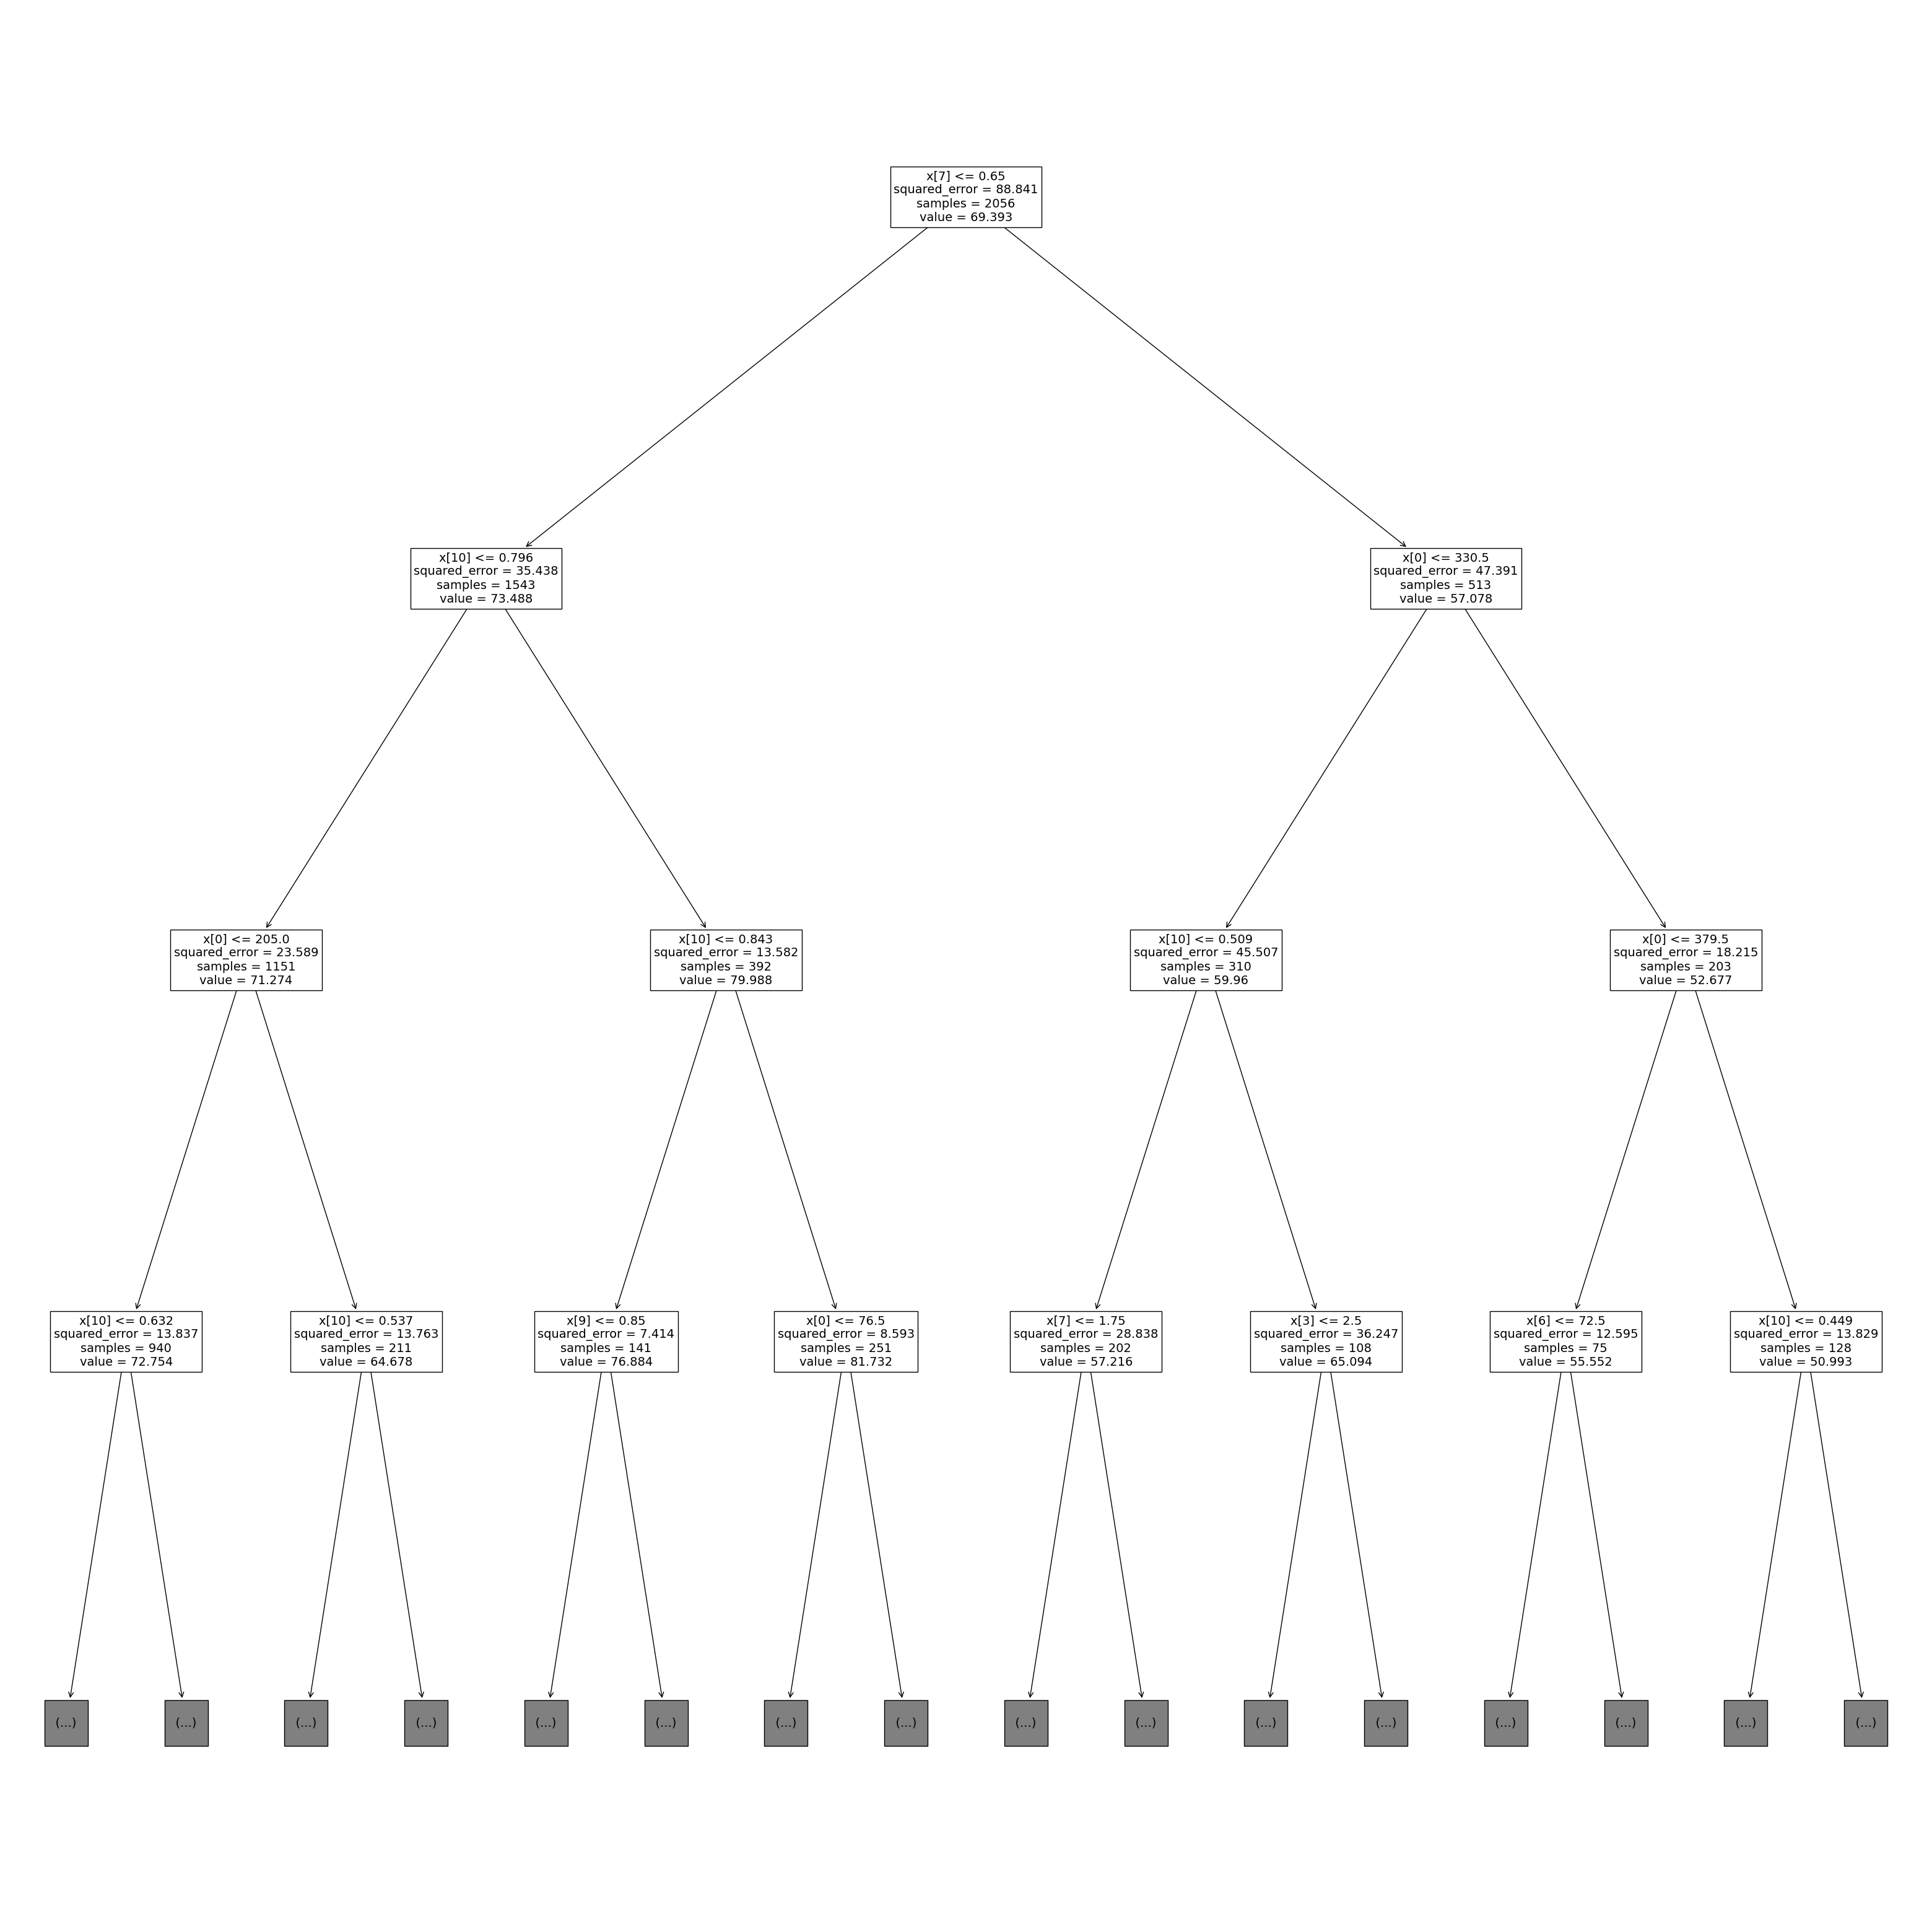

In [101]:
# La visualización del mejor árbol

tree_reg.fit(X_train['mean_rem'],y_train['mean_rem'])
plt.figure(figsize=(40,40))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)

Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection, datos imputados con la media y eliminación de variables altamente correlacionadas entre sí

In [102]:
# Tiempo de ejecución aprox: 10s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_t = SelectKBest(score_func=f_regression, k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.550 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.546 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.528 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [103]:
tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [104]:
tuning_model.best_score_

0.9084239479024036

Modelo de árbol de regresión con feature selection, datos imputados con la media y eliminación de variables altamente correlacionadas entre sí.

In [105]:

pipe_dt = make_pipeline(SelectKBest(score_func=f_regression, k=5),
              DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'))

model,metrics = regression_metrics(pipe_dt,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9645700762279313
Test R^2 = 0.9117922440810948
Training Adj R^2 = 0.9643619709488003
Test Adj R^2 = 0.9105741853112135
Training MAE = 1.25078809458176
Test MAE = 1.866008804650228
Training MAPE = 0.018453571502999536
Test MAPE = 0.02845779985372481
Training RMSE = 1.7741600182286545
Test RMSE = 2.831286634370584


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con datos imputados con knn y eliminación de variables altamente correlacionadas entre sí

In [106]:
# Tiempo de ejecución aprox: 9s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.532 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.529 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.526 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [107]:
tuning_model.best_params_

{'max_depth': 11,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [108]:
tuning_model.best_score_

0.9101843826693424

Modelo de árbol de regresión con datos imputados con knn y eliminación de variables altamente correlacionadas entre sí.

In [109]:
tree_reg = DecisionTreeRegressor(random_state=1234,max_depth=11,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=3,
                                         splitter='best')

model,metrics = regression_metrics(tree_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9817863876052191
Test R^2 = 0.9125472894631322
Training Adj R^2 = 0.9816794060346183
Test Adj R^2 = 0.9113396570966853
Training MAE = 0.8317900659555313
Test MAE = 1.8689992541491018
Training MAPE = 0.01217023346485605
Test MAPE = 0.02827386875180966
Training RMSE = 1.2720545156539906
Test RMSE = 2.8191428933415943


Búsqueda del mejor modelo para árbol de decisión con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [110]:
# Tiempo de ejecución aprox: 10s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV

X_t = SelectKBest(score_func=f_regression, k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])

tuning_model=GridSearchCV(DecisionTreeRegressor(random_state=1234),param_grid=parameters,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['knn_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.565 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.550 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.546 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.528 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.527 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.577 total time=   0.0s
[CV 3/3] END max_de

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [111]:
tuning_model.best_params_

{'max_depth': 9,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [112]:
tuning_model.best_score_

0.9084239479024036

Modelo de árbol de regresión con feature selection y datos imputados con knn

In [113]:
pipe_dt = make_pipeline(SelectKBest(score_func=f_regression, k=5),
              DecisionTreeRegressor(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'))

model,metrics = regression_metrics(pipe_dt,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/DecissionTreeRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9645700762279313
Test R^2 = 0.9117922440810948
Training Adj R^2 = 0.9643619709488003
Test Adj R^2 = 0.9105741853112135
Training MAE = 1.25078809458176
Test MAE = 1.866008804650228
Training MAPE = 0.018453571502999536
Test MAPE = 0.02845779985372481
Training RMSE = 1.7741600182286545
Test RMSE = 2.831286634370584


### 6.4. Modelo de Random Forest

Empezamos trabajando con los datos imputados con la media

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1234)

regression_metrics(rf,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

rf.fit(X_train['mean_rem'],y_train['mean_rem'])
print(rf.get_params())

Training R^2 = 0.9934044617908626
Test R^2 = 0.9486495807626147
Training Adj R^2 = 0.9933657214783272
Test Adj R^2 = 0.9479404840642849
Training MAE = 0.4939695652867226
Test MAE = 1.4191190290323772
Training MAPE = 0.007420808402686893
Test MAPE = 0.021641581007244563
Training RMSE = 0.7654781511847378
Test RMSE = 2.160242215935224
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto con datos imputados con la media y eliminación de variables

In [115]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.943 total time=   1.7s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.940 total time=   1.5s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   1.5s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.943 total time=   3.6s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.939 total time=   3.3s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.948 total time=   3.0s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.943 total time=   1.4s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [116]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [117]:
tuning_model.best_score_

0.9448435183007001

Modelo de Random Forest con datos imputados con la media y eliminación de variables

In [118]:
# El mejor modelo de Random Forest
# Con imputación con la media y elimnación de variables

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/RandomForestRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpMeanRemMetrics.pkl','wb'))


Training R^2 = 0.9897848515890718
Test R^2 = 0.947685971567298
Training Adj R^2 = 0.9897248507173483
Test Adj R^2 = 0.9469635684128763
Training MAE = 0.5864704044494418
Test MAE = 1.4380986566010714
Training MAPE = 0.008807628181924942
Test MAPE = 0.02192056244836314
Training RMSE = 0.9526426461213509
Test RMSE = 2.180416873023493


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con la media

In [119]:
# Tiempo de ejecución aprox: 2m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])



Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.942 total time=   0.8s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.937 total time=   0.8s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.946 total time=   0.8s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.942 total time=   2.3s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.937 total time=   2.1s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.946 total time=   1.6s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   0.8s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.937 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [120]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [121]:
tuning_model.best_score_

0.9429111162820313

Modelo de Random Forest con feature selection y datos imputados con la media

In [122]:
# Con feature selection e imputación con la media

pipe_rf = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400))

model,metrics = regression_metrics(pipe_rf,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpMeanRemMetrics.pkl','wb'))


Training R^2 = 0.987485164461738
Test R^2 = 0.944220396255155
Training Adj R^2 = 0.9874116558829523
Test Adj R^2 = 0.943450137054996
Training MAE = 0.6665127882732957
Test MAE = 1.4605984328060586
Training MAPE = 0.009977643679864546
Test MAPE = 0.022253576812780295
Training RMSE = 1.0544360664916057
Test RMSE = 2.2514803680660536


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto con datos imputados con knn y elimnación de variables

In [123]:
# Tiempo de ejecución aprox: 4m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.943 total time=   1.5s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.940 total time=   2.0s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   2.1s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.943 total time=   2.9s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.939 total time=   2.9s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.948 total time=   3.0s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   1.6s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.939 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [124]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [125]:
tuning_model.best_score_

0.9447094273523818

In [126]:
# Guardamos el mejor modelo

rf_reg = RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=400)

model,metrics = regression_metrics(rf_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9897553528251695
Test R^2 = 0.9473458260318708
Training Adj R^2 = 0.9896951786861102
Test Adj R^2 = 0.9466187258159703
Training MAE = 0.5889216758748003
Test MAE = 1.444211695174425
Training MAPE = 0.008840488190763891
Test MAPE = 0.02201333225609222
Training RMSE = 0.9540171499906906
Test RMSE = 2.1874939174083607


Búsqueda del mejor modelo para Random Forest con GridSearchCV
- Conjunto de datos con feature selection y datos imputados con knn

In [127]:
# Tiempo de ejecución aprox: 2m

params = {'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [200, 400]}

tuning_model=GridSearchCV(RandomForestRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])
tuning_model.fit(X_t,y_train['knn_rem'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.942 total time=   0.9s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.937 total time=   0.8s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.946 total time=   0.8s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.942 total time=   1.6s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.937 total time=   1.5s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.946 total time=   1.5s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   0.8s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.937 total time=   

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='r2', verbose=3)

In [128]:
tuning_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [129]:
tuning_model.best_score_

0.9429111162820313

Modelo de Random Forest con feature selection y datos imputados con knn

In [130]:
# Con feature selection e imputación con knn


pipe_rf = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         RandomForestRegressor(random_state=1234,max_depth=20,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         n_estimators=200))

model,metrics = regression_metrics(pipe_rf,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/RandomForestRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9873224651360135
Test R^2 = 0.9442736779023152
Training Adj R^2 = 0.9872480009077376
Test Adj R^2 = 0.9435041544671343
Training MAE = 0.6687879951575848
Test MAE = 1.4601152199382883
Training MAPE = 0.010010306476621145
Test MAPE = 0.02224754256174093
Training RMSE = 1.0612680401307368
Test RMSE = 2.2504047845572046


### 6.5. Modelo de Gradient Boosting

In [131]:
# Datos imputados con la media

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=1234)

regression_metrics(gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

gb.fit(X_train['mean_rem'],y_train['mean_rem'])
print(gb.get_params())

Training R^2 = 0.9550589705070731
Test R^2 = 0.9264754522065739
Training Adj R^2 = 0.9547949997024157
Test Adj R^2 = 0.9254601535028673
Training MAE = 1.4686031707755711
Test MAE = 1.8628349669059077
Training MAPE = 0.02181939200459242
Test MAPE = 0.02819051050983772
Training RMSE = 1.998155061150582
Test RMSE = 2.5849171809018854
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1234, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Búsqueda del mejor modelo para Gradient Boosting con GridSearchCV
- Conjunto de datos imputados con la media

In [132]:
# Tiempo de ejecución aprox: 6m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.939 total time=   1.9s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.941 total time=   1.5s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.942 total time=   1.5s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.935 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.938 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.946 total time=   2.9s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.945 total time=   3.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [133]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [134]:
tuning_model.best_score_

0.9540846458301164

Modelo de Gradient Boosting con datos imputados con la media

In [135]:
# Con todas las variables e imputación con la media

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9990508521167247
Test R^2 = 0.9584654639996741
Training Adj R^2 = 0.9990452770924471
Test Adj R^2 = 0.9578919145957571
Training MAE = 0.2202116274344487
Test MAE = 1.2507222163851592
Training MAPE = 0.0031917866567625045
Test MAPE = 0.01898966499451237
Training RMSE = 0.2903852954347733
Test RMSE = 1.9428314883184776


Modelo de Gradient Boosting con feature selection y datos imputados con la media

In [136]:
# Tiempo de ejecución aprox: 3m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.937 total time=   0.9s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.934 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.938 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.936 total time=   0.6s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.931 total time=   0.5s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   0.5s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.943 total time=   2.2s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.937 total time=   2.1s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [137]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [138]:
tuning_model.best_score_

0.9476951700196956

In [139]:
# Con feature selection e imputación con la media

pipe_gb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=500,
                                         subsample=0.5))

model,metrics = regression_metrics(pipe_gb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9924815237139303
Test R^2 = 0.9491284654055305
Training Adj R^2 = 0.9924373623260532
Test Adj R^2 = 0.9484259816136621
Training MAE = 0.5966834263671829
Test MAE = 1.4317714963575618
Training MAPE = 0.00862747109210207
Test MAPE = 0.021822384984841514
Training RMSE = 0.8172832459121468
Test RMSE = 2.150145608589588


Modelo de Gradient Boosting con datos imputados con knn

In [140]:
# Tiempo de ejecución aprox: 9m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]
            }

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.939 total time=   1.5s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.941 total time=   1.5s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.942 total time=   1.5s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.936 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.938 total time=   1.1s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.945 total time=   3.8s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.944 total time=   2.9s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [141]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [142]:
tuning_model.best_score_

0.9540099324891692

In [143]:
# Con imputación con knn

gb_reg = GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5)

model,metrics = regression_metrics(gb_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9990426382829463
Test R^2 = 0.9577360523318045
Training Adj R^2 = 0.9990370150129488
Test Adj R^2 = 0.9571524304997926
Training MAE = 0.22173783389537777
Test MAE = 1.2638771461636755
Training MAPE = 0.0032107417633965895
Test MAPE = 0.019187041824009748
Training RMSE = 0.2916390718625074
Test RMSE = 1.9598168263170248


In [144]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Modelo de Gradient Boosting con feature selection y datos imputados con knn

In [145]:
# Tiempo de ejecución aprox: 5m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])

tuning_model=GridSearchCV(GradientBoostingRegressor(random_state=1234),param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['knn_rem'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.937 total time=   0.9s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.934 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.938 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.936 total time=   0.6s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.931 total time=   0.6s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.937 total time=   0.6s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.943 total time=   2.4s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.937 total time=   2.4s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_e

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [146]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [147]:
tuning_model.best_score_

0.9476951700196956

In [148]:
# Con feature selection e imputación con knn

pipe_gb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                        GradientBoostingRegressor(random_state=1234,learning_rate=0.01,
                                         max_depth=8,
                                         n_estimators=500,
                                         subsample=0.5))

model,metrics = regression_metrics(pipe_gb,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/GradientBoostingRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingRegressorFSImpKnnRemMetrics.pkl','wb'))

Training R^2 = 0.9924815237139303
Test R^2 = 0.9491284654055305
Training Adj R^2 = 0.9924373623260532
Test Adj R^2 = 0.9484259816136621
Training MAE = 0.5966834263671829
Test MAE = 1.4317714963575618
Training MAPE = 0.00862747109210207
Test MAPE = 0.021822384984841514
Training RMSE = 0.8172832459121468
Test RMSE = 2.150145608589588


### Modelo de XGBoosting

In [149]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=1234)
regression_metrics(model,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])

Training R^2 = 0.9993586078211756
Test R^2 = 0.9463972449435794
Training Adj R^2 = 0.9993548404662339
Test Adj R^2 = 0.9456570457943537
Training MAE = 0.16821442666905131
Test MAE = 1.4557208695973054
Training MAPE = 0.002447143878597311
Test MAPE = 0.02223727402999415
Training RMSE = 0.23870939323294377
Test RMSE = 2.2071101504693034


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...),
 {'Training R^2': 0.9993586078211756,
  'Test R^2': 0.9463972449435794,
  'Training Adj R^2': 0.9993548404662339,
  'Test Adj R^2': 0.9456570457943537,
  'Training MAE': 0.16821442666905131,
  'Test MAE': 1.4557208695973054,
  'Training MAPE

Búsqueda del mejor modelo para XGBoosting con GridSearchCV
- Conjunto de datos con datos imputados con la media

In [150]:
# Tiempo de ejecución aprox: 28m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),
                  'eta'          : (0.001,10)
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['mean_rem'],y_train['mean_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.901 total time=   0.2s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.905 total time=   0.2s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.904 total time=   1.9s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.902 total time=   2.3s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.906 total time=   0.3s
[CV 3/3] END alpha=0, eta=0.001, gam

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1234, ...),
             param_grid={'alpha': (0, 10), 'eta': (0.001, 10), 'gamma': (0, 1),
                         'learning_rate': [0.01, 0.03], 'max_depth': (2, 5),
                         'min_child_weight': (0, 5),
                         'n_estimators': [500, 1000],
                         'scale_pos_weight': (5, 15), 'subsample': [0.5, 0.2]},
             scoring='r2', verbose=3)

In [154]:
tuning_model.best_params_

{'alpha': 0,
 'eta': 0.001,
 'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 1000,
 'scale_pos_weight': 5,
 'subsample': 0.5}

In [155]:
tuning_model.best_score_

0.9502933935463563

Modelo de XGBoosting con datos imputados con la media

In [156]:
# Con todas las variables e imputación con la media

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpMeanRemMetrics.pkl','wb'))

Training R^2 = 0.9971527022673863
Test R^2 = 0.9576550530972868
Training Adj R^2 = 0.9971359780516293
Test Adj R^2 = 0.9570703127488028
Training MAE = 0.35747457093530033
Test MAE = 1.273705186968306
Training MAPE = 0.005200279115162469
Test MAPE = 0.01933849595575713
Training RMSE = 0.5029491981561227
Test RMSE = 1.961693930632448


FileNotFoundError: [Errno 2] No such file or directory: 'models/XGBoostingRegressorImpMeanRem.pkl'

Modelo de XGBoosting con feature selection y datos imputados con la media

In [157]:
# Tiempo de ejecución aprox: 30m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),
                  'eta'          : (0.001,10)
            }

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['mean_rem'],y_train['mean_rem'])

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_t,y_train['mean_rem'])

Fitting 3 folds for each of 512 candidates, totalling 1536 fits
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.897 total time=   0.3s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.899 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.5;, score=0.901 total time=   0.1s
[CV 1/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.898 total time=   0.1s
[CV 2/3] END alpha=0, eta=0.001, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=0, n_estimators=500, scale_pos_weight=5, subsample=0.2;, score=0.901 total time=   0.1s
[CV 3/3] END alpha=0, eta=0.001, gam

KeyboardInterrupt: 

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con la media

pipe_xgb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=500,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5))
model,metrics = regression_metrics(pipe_xgb,X_train['mean_rem'],X_test['mean_rem'],y_train['mean_rem'],y_test['mean_rem'])
pickle.dump(model, open('models/XGBoostingRegressorFSImpMeanRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpMeanRemMetrics.pkl','wb'))

Modelo de XGBoosting con datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 65m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),
                  'eta'          : (0.001,10)
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)
tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con imputación con knn

xgb_reg = xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=8,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=5,
                                         scale_pos_weight=5)

model,metrics = regression_metrics(xgb_reg,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/XGBoostingRegressorImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorImpKnnRemMetrics.pkl','wb'))

Modelo de XGBoosting con feature selection y datos imputados con knn

In [ ]:
# Tiempo de ejecución aprox: 34m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8],
                  'gamma'        : (0,1),
                  'min_child_weight' : (0,5),
                  'scale_pos_weight' : (5,15),
                  'max_depth'    : (2,5),
                  'alpha'        : (0,10),
                  'eta'          : (0.001,10)
            }

tuning_model=GridSearchCV(xgb.XGBRegressor(random_state=1234),
                          param_grid=params,scoring='r2',cv=3,verbose=3)

X_t = SelectKBest(score_func=f_regression,k=5).fit_transform(X_train['knn_rem'],y_train['knn_rem'])

tuning_model.fit(X_train['knn_rem'],y_train['knn_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
tuning_model.best_score_

In [ ]:
# Con feature selection e imputación con knn

pipe_xgb = make_pipeline(SelectKBest(score_func=f_regression,k=5),
                         xgb.XGBRegressor(random_state=1234,learning_rate=0.03,
                                         max_depth=5,
                                         n_estimators=1000,
                                         subsample=0.5,
                                         alpha=0,
                                         eta=0.001,
                                         gamma=0,
                                         min_child_weight=0,
                                         scale_pos_weight=5))
model,metrics = regression_metrics(pipe_xgb,X_train['knn_rem'],X_test['knn_rem'],y_train['knn_rem'],y_test['knn_rem'])
pickle.dump(model, open('models/XGBoostingRegressorFSImpKnnRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostingRegressorFSImpKnnRemMetrics.pkl','wb'))

### Comparación de los distintos modelos

Cargamos las métricas de los modelos previamente guardados

In [ ]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/KnnRegressorImpMeanRemMetrics.pkl','rb')))
names.append('KnnRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('KnnRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorImpKnnRemMetrics.pkl','rb')))
names.append('KnnRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/KnnRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('KnnRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpMeanRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorImpKnnRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('DecisionTreeRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpMeanRemMetrics.pkl','rb')))
names.append('RandomForestRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorImpKnnRemMetrics.pkl','rb')))
names.append('RandomForestRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('RandomForestRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpMeanRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorImpKnnRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('GradientBoostingRegressorFSImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpMeanRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpMeanRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpMeanRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorImpKnnRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorImpKnnRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostingRegressorFSImpKnnRemMetrics.pkl','rb')))
names.append('XGBoostingRegressorFSImpKnnRemMetrics')

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test R^2'] for i in metrics])
ax.set(title='R^2 de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al R^2 ajustado de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Adj R^2'] for i in metrics])
ax.set(title='R^2 ajustado de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAE'] for i in metrics])
ax.set(title='MAE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al MAPE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test MAPE'] for i in metrics])
ax.set(title='MAPE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al RMSE de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test RMSE'] for i in metrics])
ax.set(title='RMSE de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test R^2':model[1]['Test R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su R^2 ajustado de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Adj R^2'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Adj R^2'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test Adj R^2':model[1]['Test Adj R^2']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su RMSE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test RMSE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test RMSE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test RMSE':model[1]['Test RMSE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAE':model[1]['Test MAE']},ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su MAPE de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test MAPE'],reverse=False)
ranking = pd.DataFrame(columns=['Model','Test MAPE'])
for model in models:
    ranking = ranking._append({'Model':model[0],'Test MAPE':model[1]['Test MAPE']},ignore_index=True)
ranking